<a href="https://colab.research.google.com/github/evelynlin2121/cgm_pred/blob/master/simulate_cgm_pred_mean_3_layers_64neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from glob import glob

# scenario 1: use 60 days cgm data 

## import and concat 10 cgm data (adult)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
files = glob("/content/drive/MyDrive/cgm_pred/simulate_cgm_60days/adult*.csv")
 
df_list = [pd.read_csv(file) for file in files]

cgm_key = ["Time"]
cgm_value = [df_list[0]['Time']]
for i in range(len(df_list)): 
    cgm_key.append('CGM_NO_0'+ str(i+1))
    cgm_value.append(df_list[i]['CGM'])
new_data = dict(zip(cgm_key, cgm_value))
len(new_data)

11

In [4]:
cgm_60d = pd.DataFrame(data=new_data)
cgm_60d

Time   CGM_NO_01   CGM_NO_02   CGM_NO_03   CGM_NO_04  \
0      2021-12-04 06:00:00  132.372142  134.482142  146.611025  143.022142   
1      2021-12-04 06:03:00  131.164663  133.274663  145.403545  141.814663   
2      2021-12-04 06:06:00  131.854524  133.964524  146.093406  142.504524   
3      2021-12-04 06:09:00  133.589223  135.699223  147.828105  144.239223   
4      2021-12-04 06:12:00  135.951553  138.061553  150.190435  146.601553   
...                    ...         ...         ...         ...         ...   
28796  2022-02-02 05:48:00  108.150661  107.709543  177.413791  165.076378   
28797  2022-02-02 05:51:00  109.501158  110.768195  182.880087  170.285502   
28798  2022-02-02 05:54:00  112.386440  115.291827  189.670861  176.844349   
28799  2022-02-02 05:57:00  115.507244  119.950267  196.412449  183.390763   
28800  2022-02-02 06:00:00  117.147706  123.003700  201.332486  188.161150   

        CGM_NO_05   CGM_NO_06   CGM_NO_07   CGM_NO_08   CGM_NO_09  CGM_NO_010  
0      138.592142  139.152142  131.562142  131.182142  141.002142  148.752142  
1      137.384663  137.944663  130.354663  129.974663  139.794663  147.544663  
2      138.074524  138.634524  131.044524  130.664524  140.484524  148.234524  
3      139.809223  140.369223  132.779223  132.399223  142.219223  149.969223  
4      142.171553  142.731553  135.141553  134.761553  144.581553  152.331553  
...           ...         ...         ...         ...         ...         ...  
28796  134.157576  114.158383  161.416710  147.825778   39.000000  157.565243  
28797  136.780418  116.111809  163.630054  150.336405   39.000000  162.761658  
28798  140.989724  119.502744  167.295034  154.217794   39.000000  169.364998  
28799  145.465298  123.029289  171.106565  158.166058   39.000000  176.017432  
28800  148.470895  124.977058  173.346619  160.466173   39.000000  180.957180  

[28801 rows x 11 columns]

In [5]:
cgm_60d['Time'] = pd.to_datetime(cgm_60d['Time'], format="%Y-%m-%d %H:%M:%S")

## Find the mean of first 9 cgm data

In [6]:
_cgm_60d_m9 = cgm_60d.drop(['CGM_NO_010'], axis=1)
_cgm_60d_m9['Mean_9_CGM'] = _cgm_60d_m9.mean(axis=1)
cgm_60d_m9 = pd.DataFrame(_cgm_60d_m9, columns=['Time', 'Mean_9_CGM'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [7]:
# Turn datas to numpy array
time_steps_60d_m9 = cgm_60d_m9["Time"].to_numpy()
cgm_60d_m9_values =  cgm_60d_m9["Mean_9_CGM"].to_numpy()

## Find the mean of first 7 cgm data

In [8]:
_cgm_60d_m7 = cgm_60d.drop(['CGM_NO_08', 'CGM_NO_09', 'CGM_NO_010'], axis=1)
_cgm_60d_m7['Mean_7_CGM'] = _cgm_60d_m7.mean(axis=1)
cgm_60d_m7 = pd.DataFrame(_cgm_60d_m7, columns=['Time', 'Mean_7_CGM'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [9]:
# Turn datas to numpy array
time_steps_60d_m7 = cgm_60d_m7["Time"].to_numpy()
cgm_60d_m7_values =  cgm_60d_m7["Mean_7_CGM"].to_numpy()

## Find the mean of first 6 cgm data

In [10]:
_cgm_60d_m6 = cgm_60d.drop(['CGM_NO_07', 'CGM_NO_08', 'CGM_NO_09', 'CGM_NO_010'], axis=1)
_cgm_60d_m6['Mean_6_CGM'] = _cgm_60d_m6.mean(axis=1)
cgm_60d_m6 = pd.DataFrame(_cgm_60d_m6, columns=['Time', 'Mean_6_CGM'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [11]:
# Turn datas to numpy array
time_steps_60d_m6 = cgm_60d_m6["Time"].to_numpy()
cgm_60d_m6_values =  cgm_60d_m6["Mean_6_CGM"].to_numpy()

## Find the mean of first 5 cgm data

In [12]:
_cgm_60d_m5 = cgm_60d.drop(['CGM_NO_06', 'CGM_NO_07', 'CGM_NO_08', 'CGM_NO_09', 'CGM_NO_010'], axis=1)
_cgm_60d_m5['Mean_5_CGM'] = _cgm_60d_m5.mean(axis=1)
cgm_60d_m5 = pd.DataFrame(_cgm_60d_m5, columns=['Time', 'Mean_5_CGM'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [13]:
# Turn datas to numpy array
time_steps_60d_m5 = cgm_60d_m5["Time"].to_numpy()
cgm_60d_m5_values =  cgm_60d_m5["Mean_5_CGM"].to_numpy()

## Find the mean of first 3 cgm data

In [14]:
_cgm_60d_m3 = cgm_60d.drop(['CGM_NO_04','CGM_NO_05','CGM_NO_06', 'CGM_NO_07', 'CGM_NO_08', 'CGM_NO_09', 'CGM_NO_010'], axis=1)
_cgm_60d_m3['Mean_3_CGM'] = _cgm_60d_m3.mean(axis=1)
cgm_60d_m3 = pd.DataFrame(_cgm_60d_m3, columns=['Time', 'Mean_3_CGM'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [15]:
# Turn datas to numpy array
time_steps_60d_m3 = cgm_60d_m3["Time"].to_numpy()
cgm_60d_m3_values =  cgm_60d_m3["Mean_3_CGM"].to_numpy()

## Prepare NO_010 data

In [16]:
time_steps_60d_no10 = cgm_60d["Time"].to_numpy()
cgm_60d_no10 = cgm_60d['CGM_NO_010'].to_numpy()

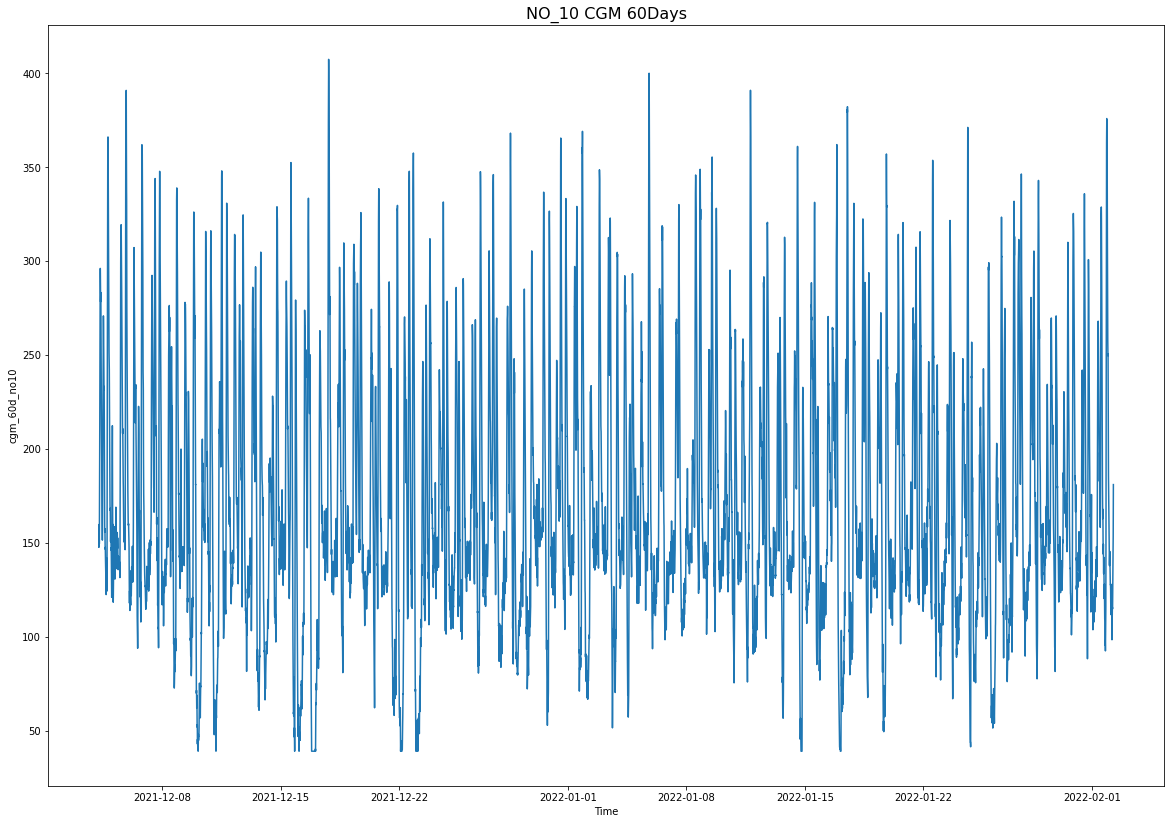

In [17]:
# Visualize the mean cgm
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 14))
plt.plot(time_steps_60d_no10, cgm_60d_no10)
plt.ylabel("cgm_60d_no10")
plt.title("NO_10 CGM 60Days", fontsize=16)
plt.xlabel("Time");

## Create train, validation and test splits
70% train
10% validation
20% test

In [18]:
# Create train, validation and test splits for time series data(70% train, 10% validation, 20% test)

def get_split(timestep, cgm):
    x_train, x_val, x_test = np.split(timestep, [int(len(timestep)*0.7), int(len(timestep)*0.8)])
    y_train, y_val, y_test = np.split(cgm, [int(len(cgm)*0.7), int(len(cgm)*0.8)])
    return x_train, x_val, x_test, y_train, y_val, y_test

In [19]:
# Splits the mean of 9 cgm
x_train_60d_m9, x_val_60d_m9, x_test_60d_m9, y_train_60d_m9, y_val_60d_m9, y_test_60d_m9 = get_split(time_steps_60d_m9, cgm_60d_m9_values)

In [20]:
# Splits the mean of 7 cgm
x_train_60d_m7, x_val_60d_m7, x_test_60d_m7, y_train_60d_m7, y_val_60d_m7, y_test_60d_m7 = get_split(time_steps_60d_m7, cgm_60d_m7_values)

In [21]:
# Splits the mean of 6 cgm
x_train_60d_m6, x_val_60d_m6, x_test_60d_m6, y_train_60d_m6, y_val_60d_m6, y_test_60d_m9 = get_split(time_steps_60d_m6, cgm_60d_m6_values)

In [22]:
# Splits the mean of 5 cgm
x_train_60d_m5, x_val_60d_m5, x_test_60d_m5, y_train_60d_m5, y_val_60d_m5, y_test_60d_m5 = get_split(time_steps_60d_m5, cgm_60d_m5_values)

In [23]:
# Splits the mean of 3 cgm
x_train_60d_m3, x_val_60d_m3, x_test_60d_m3, y_train_60d_m3, y_val_60d_m3, y_test_60d_m3 = get_split(time_steps_60d_m3, cgm_60d_m3_values)

In [24]:
# Splits the no10 cgm
x_train_60d_no10, x_val_60d_no10, x_test_60d_no10, y_train_60d_no10, y_val_60d_no10, y_test_60d_no10 = get_split(time_steps_60d_no10, cgm_60d_no10)

## Create windowed data(7 points -> 13th points)

In [25]:
# Setup window and horizon size
HORIZON = 1 # predict 1 value
PREDICT_GAP = 12 # after 12 value
WINDOW_SIZE = 7 # use the past 7 values to make the prediction

In [26]:
# Create function to window
def get_labelled_windows(x, window_size, horizon):
    return x[:, :window_size], x[:, -horizon:]

In [27]:
# Create function to view Numpy arrays as windows 

def make_windows(x, window_size, horizon, predict_gap):
    """
    Turns a 1D array into a 2D array.
    """
    window_step = np.expand_dims(np.arange(predict_gap+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-predict_gap), axis=0).T
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, window_size, horizon)
    return windows, labels

In [28]:
# Turn the mean of 9 cgm windowed
full_windows_60d_m9, full_labels_60d_m9= make_windows(cgm_60d_m9_values, WINDOW_SIZE, HORIZON, PREDICT_GAP)
len(full_windows_60d_m9), len(full_windows_60d_m9)

(28789, 28789)

In [29]:
# Turn the mean of 7 cgm windowed
full_windows_60d_m7, full_labels_60d_m7= make_windows(cgm_60d_m7_values, WINDOW_SIZE, HORIZON, PREDICT_GAP)
len(full_windows_60d_m7), len(full_windows_60d_m7)

(28789, 28789)

In [30]:
# Turn the mean of 6 cgm windowed
full_windows_60d_m6, full_labels_60d_m6= make_windows(cgm_60d_m6_values, WINDOW_SIZE, HORIZON, PREDICT_GAP)
len(full_windows_60d_m6), len(full_windows_60d_m6)

(28789, 28789)

In [31]:
# Turn the mean of 5 cgm windowed
full_windows_60d_m5, full_labels_60d_m5= make_windows(cgm_60d_m5_values, WINDOW_SIZE, HORIZON, PREDICT_GAP)
len(full_windows_60d_m5), len(full_windows_60d_m5)

(28789, 28789)

In [32]:
# Turn the mean of 3 cgm windowed
full_windows_60d_m3, full_labels_60d_m3= make_windows(cgm_60d_m3_values, WINDOW_SIZE, HORIZON, PREDICT_GAP)
len(full_windows_60d_m3), len(full_labels_60d_m3)

(28789, 28789)

In [33]:
# Turn the no10 cgm windowed
full_windows_60d_no10, full_labels_60d_no10= make_windows(cgm_60d_no10, WINDOW_SIZE, HORIZON, PREDICT_GAP)
len(full_windows_60d_no10), len(full_labels_60d_no10)

(28789, 28789)

## Create train, validation and test splits
70% train
10% validation
20% test

In [34]:
# Create train, validation and test splits for time series data(70% train, 10% validation, 20% test)

def get_train_val_test_splits(windows, labels):
    train_windows, val_windows, test_windows = np.split(windows, [int(len(windows)*0.7), int(len(windows)*0.8)])
    train_labels, val_labels, test_labels = np.split(labels, [int(len(labels)*0.7), int(len(labels)*0.8)])
    return train_windows, val_windows, test_windows, train_labels, val_labels, test_labels

In [35]:
# Splits the windowed mean of 9 cgm
train_windows_60d_m9, val_windows_60d_m9, test_windows_60d_m9, train_labels_60d_m9, val_labels_60d_m9, test_labels_60d_m9 = get_train_val_test_splits(full_windows_60d_m9, full_labels_60d_m9)

In [36]:
# Splits the windowed mean of 7 cgm
train_windows_60d_m7, val_windows_60d_m7, test_windows_60d_m7, train_labels_60d_m7, val_labels_60d_m7, test_labels_60d_m7 = get_train_val_test_splits(full_windows_60d_m7, full_labels_60d_m7)

In [37]:
# Splits the windowed mean of 6 cgm
train_windows_60d_m6, val_windows_60d_m6, test_windows_60d_m6, train_labels_60d_m6, val_labels_60d_m6, test_labels_60d_m6 = get_train_val_test_splits(full_windows_60d_m6, full_labels_60d_m6)

In [38]:
# Splits the windowed mean of 5 cgm
train_windows_60d_m5, val_windows_60d_m5, test_windows_60d_m5, train_labels_60d_m5, val_labels_60d_m5, test_labels_60d_m5 = get_train_val_test_splits(full_windows_60d_m5, full_labels_60d_m5)

In [39]:
# Splits the windowed mean of 3 cgm
train_windows_60d_m3, val_windows_60d_m3, test_windows_60d_m3, train_labels_60d_m3, val_labels_60d_m3, test_labels_60d_m3 = get_train_val_test_splits(full_windows_60d_m3, full_labels_60d_m3)

In [40]:
# Splits the windowed no10 cgm
train_windows_60d_no10, val_windows_60d_no10, test_windows_60d_no10, train_labels_60d_no10, val_labels_60d_no10, test_labels_60d_no10 = get_train_val_test_splits(full_windows_60d_no10, full_labels_60d_no10)

## Functions

In [41]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                              verbose=0, # only output a limited amount of text
                                              save_best_only=True)

In [42]:
import tensorflow as tf
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy()}

In [43]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters
    ----------
    timesteps : array of timestep values
    values : array of values a across time
    format : style of plot, default "."
    start : where to start the plot (setting a value will index from start of timesteps & values)
    end : where to end the plot (similar to start but for the end)
    label : label to show on plot about values, defalut None
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("CGM value")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

In [44]:
def make_preds(model, input_data):
    """
    Uses model to make predictions on input_data.

    Parameters
    ----------
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

    Returns model predictions on input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

## Experiment 0(no 10)
* Use the no010 cgm training a model
* Validated by no010 cgm data
* Test on no010 cgm



In [45]:
import tensorflow as tf
from tensorflow.keras import layers

In [46]:
tf.random.set_seed(21)
model_0 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_0_dense")

model_0.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_0.fit(x=train_windows_60d_no10,
            y=train_labels_60d_no10,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_no10, val_labels_60d_no10),
            callbacks=[create_model_checkpoint(model_name=model_0.name)]
            )

Epoch 1/200
158/158 [==============================] - 4s 9ms/step - loss: 27.6424 - mae: 27.6424 - mse: 2505.5256 - val_loss: 13.6845 - val_mae: 13.6845 - val_mse: 346.8250
Epoch 2/200
158/158 [==============================] - 1s 6ms/step - loss: 12.1918 - mae: 12.1918 - mse: 284.8083 - val_loss: 13.1015 - val_mae: 13.1015 - val_mse: 319.7803
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 11.8450 - mae: 11.8450 - mse: 268.9291 - val_loss: 12.6999 - val_mae: 12.6999 - val_mse: 307.4944
Epoch 4/200
158/158 [==============================] - 0s 3ms/step - loss: 11.7073 - mae: 11.7073 - mse: 262.5960 - val_loss: 12.7904 - val_mae: 12.7904 - val_mse: 303.4546
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 11.4486 - mae: 11.4486 - mse: 250.2837 - val_loss: 12.6392 - val_mae: 12.6392 - val_mse: 307.0476
Epoch 6/200
158/158 [==============================] - 1s 6ms/step - loss: 11.3580 - mae: 11.3580 - mse: 247.0665 - val_loss: 12.1358 

## Experiment 1-9(mean 9)
* Use the the mean of 9 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm



In [47]:
tf.random.set_seed(21)
model_1_9 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_9_dense")

model_1_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_9.fit(x=train_windows_60d_m9,
            y=train_labels_60d_m9,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_no10, val_labels_60d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_9.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 8ms/step - loss: 23.2493 - mae: 23.2493 - mse: 1766.3710 - val_loss: 16.1103 - val_mae: 16.1103 - val_mse: 495.7937
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 10.3126 - mae: 10.3126 - mse: 193.5810 - val_loss: 13.3693 - val_mae: 13.3693 - val_mse: 343.8157
Epoch 3/200
158/158 [==============================] - 1s 6ms/step - loss: 9.8860 - mae: 9.8860 - mse: 174.7851 - val_loss: 13.2586 - val_mae: 13.2586 - val_mse: 327.2877
Epoch 4/200
158/158 [==============================] - 1s 7ms/step - loss: 9.6785 - mae: 9.6785 - mse: 167.5479 - val_loss: 13.2527 - val_mae: 13.2527 - val_mse: 321.4384
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 9.5317 - mae: 9.5317 - mse: 162.9196 - val_loss: 12.7497 - val_mae: 12.7497 - val_mse: 311.9188
Epoch 6/200
158/158 [==============================] - 0s 3ms/step - loss: 9.5774 - mae: 9.5774 - mse: 164.0754 - val_loss: 13.0898 - val_ma

## Experiment 1-7(mean 7)
* Use the the mean of 9 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm



In [48]:
tf.random.set_seed(21)
model_1_7 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_7_dense")

model_1_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_7.fit(x=train_windows_60d_m7,
             y=train_labels_60d_m7,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_no10, val_labels_60d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_7.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 25.0565 - mae: 25.0565 - mse: 2028.7676 - val_loss: 15.6491 - val_mae: 15.6491 - val_mse: 473.0038
Epoch 2/200
158/158 [==============================] - 1s 6ms/step - loss: 11.1867 - mae: 11.1867 - mse: 226.6506 - val_loss: 13.4966 - val_mae: 13.4966 - val_mse: 343.3286
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 10.7919 - mae: 10.7919 - mse: 207.6565 - val_loss: 13.1791 - val_mae: 13.1791 - val_mse: 325.0645
Epoch 4/200
158/158 [==============================] - 0s 3ms/step - loss: 10.5227 - mae: 10.5227 - mse: 198.0535 - val_loss: 13.6333 - val_mae: 13.6333 - val_mse: 333.2889
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 10.3830 - mae: 10.3830 - mse: 192.9541 - val_loss: 12.8103 - val_mae: 12.8103 - val_mse: 314.4404
Epoch 6/200
158/158 [==============================] - 0s 3ms/step - loss: 10.3166 - mae: 10.3166 - mse: 190.3862 - val_loss: 13.0184 

## Experiment 1-6(mean 6)
* Use the the mean of 6 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm

In [49]:
tf.random.set_seed(21)
model_1_6 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_6_dense")

model_1_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_6.fit(x=train_windows_60d_m6,
            y=train_labels_60d_m6,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_no10, val_labels_60d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_6.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 25.0427 - mae: 25.0427 - mse: 1985.9673 - val_loss: 15.7803 - val_mae: 15.7803 - val_mse: 507.3100
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 11.4495 - mae: 11.4495 - mse: 241.7772 - val_loss: 13.5121 - val_mae: 13.5121 - val_mse: 354.6282
Epoch 3/200
158/158 [==============================] - 1s 6ms/step - loss: 10.8051 - mae: 10.8051 - mse: 209.4299 - val_loss: 13.0680 - val_mae: 13.0680 - val_mse: 320.6579
Epoch 4/200
158/158 [==============================] - 1s 8ms/step - loss: 10.5622 - mae: 10.5622 - mse: 199.9523 - val_loss: 13.0635 - val_mae: 13.0635 - val_mse: 315.0219
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 10.3657 - mae: 10.3657 - mse: 193.3027 - val_loss: 12.6939 - val_mae: 12.6939 - val_mse: 309.4672
Epoch 6/200
158/158 [==============================] - 1s 3ms/step - loss: 10.3375 - mae: 10.3375 - mse: 191.9335 - val_loss: 13.3176 

## Experiment 1-5(mean 5)
* Use the the mean of 5 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm

In [50]:
tf.random.set_seed(21)
model_1_5 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_5_dense")

model_1_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_5.fit(x=train_windows_60d_m5,
            y=train_labels_60d_m5,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_no10, val_labels_60d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_5.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 9ms/step - loss: 25.4766 - mae: 25.4766 - mse: 2073.5964 - val_loss: 15.8301 - val_mae: 15.8301 - val_mse: 472.1998
Epoch 2/200
158/158 [==============================] - 1s 6ms/step - loss: 11.4334 - mae: 11.4334 - mse: 240.9995 - val_loss: 13.2729 - val_mae: 13.2729 - val_mse: 335.7103
Epoch 3/200
158/158 [==============================] - 1s 3ms/step - loss: 10.9603 - mae: 10.9603 - mse: 217.1452 - val_loss: 13.4034 - val_mae: 13.4034 - val_mse: 329.7098
Epoch 4/200
158/158 [==============================] - 1s 7ms/step - loss: 10.7128 - mae: 10.7128 - mse: 207.9098 - val_loss: 13.2288 - val_mae: 13.2288 - val_mse: 318.6717
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 10.5581 - mae: 10.5581 - mse: 202.4457 - val_loss: 12.9373 - val_mae: 12.9373 - val_mse: 319.1700
Epoch 6/200
158/158 [==============================] - 1s 7ms/step - loss: 10.6092 - mae: 10.6092 - mse: 203.3156 - val_loss: 12.6168 

## Experiment 1-3(mean 3)
* Use the the mean of 3 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm

In [51]:
tf.random.set_seed(21)
model_1_3 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_3_dense")

model_1_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_3.fit(x=train_windows_60d_m3,
            y=train_labels_60d_m3,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_no10, val_labels_60d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_3.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 24.8277 - mae: 24.8277 - mse: 1983.5599 - val_loss: 16.0151 - val_mae: 16.0151 - val_mse: 489.9399
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 11.1836 - mae: 11.1836 - mse: 229.9713 - val_loss: 13.4667 - val_mae: 13.4667 - val_mse: 346.5410
Epoch 3/200
158/158 [==============================] - 1s 6ms/step - loss: 10.6018 - mae: 10.6018 - mse: 202.9221 - val_loss: 13.0931 - val_mae: 13.0931 - val_mse: 319.7546
Epoch 4/200
158/158 [==============================] - 0s 3ms/step - loss: 10.4270 - mae: 10.4270 - mse: 196.5060 - val_loss: 13.2431 - val_mae: 13.2431 - val_mse: 320.0369
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 10.3176 - mae: 10.3176 - mse: 192.7655 - val_loss: 12.9642 - val_mae: 12.9642 - val_mse: 321.4948
Epoch 6/200
158/158 [==============================] - 1s 3ms/step - loss: 10.3133 - mae: 10.3133 - mse: 192.2792 - val_loss: 13.0996 

## Experiment 2-9(mean 9)
* Use the the mean of 9 cgm training a model
* Validated by the mean of 9 cgm
* Test on the no 10 cgm

In [52]:
tf.random.set_seed(21)
model_2_9 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_9_dense")

model_2_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_9.fit(x=train_windows_60d_m9,
            y=train_labels_60d_m9,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_m9, val_labels_60d_m9),
            callbacks=[create_model_checkpoint(model_name=model_2_9.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 23.2493 - mae: 23.2493 - mse: 1766.3710 - val_loss: 11.3336 - val_mae: 11.3336 - val_mse: 228.7712
Epoch 2/200
158/158 [==============================] - 1s 6ms/step - loss: 10.3126 - mae: 10.3126 - mse: 193.5810 - val_loss: 10.1683 - val_mae: 10.1683 - val_mse: 186.6140
Epoch 3/200
158/158 [==============================] - 1s 6ms/step - loss: 9.8860 - mae: 9.8860 - mse: 174.7850 - val_loss: 10.0152 - val_mae: 10.0152 - val_mse: 180.5040
Epoch 4/200
158/158 [==============================] - 1s 6ms/step - loss: 9.6785 - mae: 9.6785 - mse: 167.5479 - val_loss: 9.9862 - val_mae: 9.9862 - val_mse: 179.1225
Epoch 5/200
158/158 [==============================] - 0s 3ms/step - loss: 9.5317 - mae: 9.5317 - mse: 162.9196 - val_loss: 10.0664 - val_mae: 10.0664 - val_mse: 183.6478
Epoch 6/200
158/158 [==============================] - 1s 8ms/step - loss: 9.5774 - mae: 9.5774 - mse: 164.0754 - val_loss: 9.8893 - val_mae: 

## Experiment 2-7(mean 7)
* Use the the mean of 7 cgm training a model
* Validated by the mean of 7 cgm
* Test on the no 10 cgm

In [53]:
tf.random.set_seed(21)
model_2_7 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_7_dense")

model_2_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_7.fit(x=train_windows_60d_m7,
            y=train_labels_60d_m7,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_m7, val_labels_60d_m7),
            callbacks=[create_model_checkpoint(model_name=model_2_7.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 25.0565 - mae: 25.0565 - mse: 2028.7676 - val_loss: 12.5326 - val_mae: 12.5326 - val_mse: 281.9447
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 11.1867 - mae: 11.1867 - mse: 226.6506 - val_loss: 11.4106 - val_mae: 11.4106 - val_mse: 233.5915
Epoch 3/200
158/158 [==============================] - 1s 6ms/step - loss: 10.7919 - mae: 10.7919 - mse: 207.6565 - val_loss: 11.2361 - val_mae: 11.2361 - val_mse: 227.3084
Epoch 4/200
158/158 [==============================] - 0s 3ms/step - loss: 10.5227 - mae: 10.5227 - mse: 198.0535 - val_loss: 11.5275 - val_mae: 11.5275 - val_mse: 235.6852
Epoch 5/200
158/158 [==============================] - 0s 3ms/step - loss: 10.3830 - mae: 10.3830 - mse: 192.9541 - val_loss: 11.3567 - val_mae: 11.3567 - val_mse: 233.8909
Epoch 6/200
158/158 [==============================] - 1s 7ms/step - loss: 10.3166 - mae: 10.3166 - mse: 190.3863 - val_loss: 11.0959 

## Experiment 2-6(mean 6)
* Use the the mean of 6 cgm training a model
* Validated by the mean of 6 cgm
* Test on the no 10 cgm

In [54]:
tf.random.set_seed(21)
model_2_6 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_6_dense")

model_2_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_6.fit(x=train_windows_60d_m6,
            y=train_labels_60d_m6,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_m6, val_labels_60d_m6),
            callbacks=[create_model_checkpoint(model_name=model_2_6.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 9ms/step - loss: 25.0427 - mae: 25.0427 - mse: 1985.9673 - val_loss: 12.7569 - val_mae: 12.7569 - val_mse: 303.8826
Epoch 2/200
158/158 [==============================] - 1s 6ms/step - loss: 11.4495 - mae: 11.4495 - mse: 241.7772 - val_loss: 11.5820 - val_mae: 11.5820 - val_mse: 244.2451
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 10.8051 - mae: 10.8051 - mse: 209.4298 - val_loss: 11.2262 - val_mae: 11.2262 - val_mse: 228.0929
Epoch 4/200
158/158 [==============================] - 1s 6ms/step - loss: 10.5622 - mae: 10.5622 - mse: 199.9523 - val_loss: 11.2171 - val_mae: 11.2171 - val_mse: 226.4155
Epoch 5/200
158/158 [==============================] - 1s 6ms/step - loss: 10.3657 - mae: 10.3657 - mse: 193.3027 - val_loss: 11.2084 - val_mae: 11.2084 - val_mse: 229.7760
Epoch 6/200
158/158 [==============================] - 1s 3ms/step - loss: 10.3375 - mae: 10.3375 - mse: 191.9335 - val_loss: 11.3842 


## Experiment 2-5(mean 5)
* Use the the mean of 5 cgm training a model
* Validated by the mean of 5 cgm
* Test on the no 10 cgm

In [55]:
tf.random.set_seed(21)
model_2_5 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_5_dense")

model_2_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_5.fit(x=train_windows_60d_m5,
            y=train_labels_60d_m5,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_m5, val_labels_60d_m5),
            callbacks=[create_model_checkpoint(model_name=model_2_5.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 25.4766 - mae: 25.4766 - mse: 2073.5964 - val_loss: 13.1279 - val_mae: 13.1279 - val_mse: 310.6971
Epoch 2/200
158/158 [==============================] - 1s 7ms/step - loss: 11.4334 - mae: 11.4334 - mse: 240.9995 - val_loss: 11.6330 - val_mae: 11.6330 - val_mse: 247.4694
Epoch 3/200
158/158 [==============================] - 0s 3ms/step - loss: 10.9603 - mae: 10.9603 - mse: 217.1452 - val_loss: 11.6672 - val_mae: 11.6672 - val_mse: 244.9531
Epoch 4/200
158/158 [==============================] - 1s 7ms/step - loss: 10.7128 - mae: 10.7128 - mse: 207.9098 - val_loss: 11.5732 - val_mae: 11.5732 - val_mse: 240.8544
Epoch 5/200
158/158 [==============================] - 0s 3ms/step - loss: 10.5581 - mae: 10.5581 - mse: 202.4456 - val_loss: 11.6545 - val_mae: 11.6545 - val_mse: 249.1692
Epoch 6/200
158/158 [==============================] - 1s 7ms/step - loss: 10.6092 - mae: 10.6092 - mse: 203.3156 - val_loss: 11.1267 

## Experiment 2-3(mean 3)
* Use the the mean of 3 cgm training a model
* Validated by the mean of 3 cgm
* Test on the no 10 cgm

In [56]:
tf.random.set_seed(21)
model_2_3 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_3_dense")

model_2_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_3.fit(x=train_windows_60d_m3,
            y=train_labels_60d_m3,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_60d_m3, val_labels_60d_m3),
            callbacks=[create_model_checkpoint(model_name=model_2_3.name)]
            )

Epoch 1/200
158/158 [==============================] - 2s 7ms/step - loss: 24.8277 - mae: 24.8277 - mse: 1983.5599 - val_loss: 12.7486 - val_mae: 12.7486 - val_mse: 293.8117
Epoch 2/200
158/158 [==============================] - 1s 6ms/step - loss: 11.1836 - mae: 11.1836 - mse: 229.9713 - val_loss: 11.3141 - val_mae: 11.3141 - val_mse: 235.7460
Epoch 3/200
158/158 [==============================] - 1s 7ms/step - loss: 10.6018 - mae: 10.6018 - mse: 202.9221 - val_loss: 11.1111 - val_mae: 11.1111 - val_mse: 225.6353
Epoch 4/200
158/158 [==============================] - 0s 3ms/step - loss: 10.4270 - mae: 10.4270 - mse: 196.5059 - val_loss: 11.2259 - val_mae: 11.2259 - val_mse: 228.8158
Epoch 5/200
158/158 [==============================] - 0s 3ms/step - loss: 10.3175 - mae: 10.3175 - mse: 192.7654 - val_loss: 11.1887 - val_mae: 11.1887 - val_mse: 232.1900
Epoch 6/200
158/158 [==============================] - 0s 3ms/step - loss: 10.3133 - mae: 10.3133 - mse: 192.2792 - val_loss: 11.1234 

## Evaluation 0(no 10)

In [57]:
# Load in saved best performing model_1 and evaluate on test data
model_0 = tf.keras.models.load_model("model_experiments/model_0_dense/")
model_0.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 7.7947 - mae: 7.7947 - mse: 120.9893


[7.794684886932373, 7.794684886932373, 120.98927307128906]

In [58]:
# predict #adult010 using model_1_9
model_0_preds = make_preds(model_0, test_windows_60d_no10)
len(model_0_preds), model_0_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([156.26288, 160.2221 , 164.70702, 170.42937, 175.19403, 178.84135,
        181.52498, 183.22649, 183.7423 , 182.86223], dtype=float32)>)

In [59]:
# Evaluate preds
model_0_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_0_preds)
model_0_results

{'mae': 7.7946844, 'mape': 5.085115, 'mse': 120.98934, 'rmse': 10.999516}

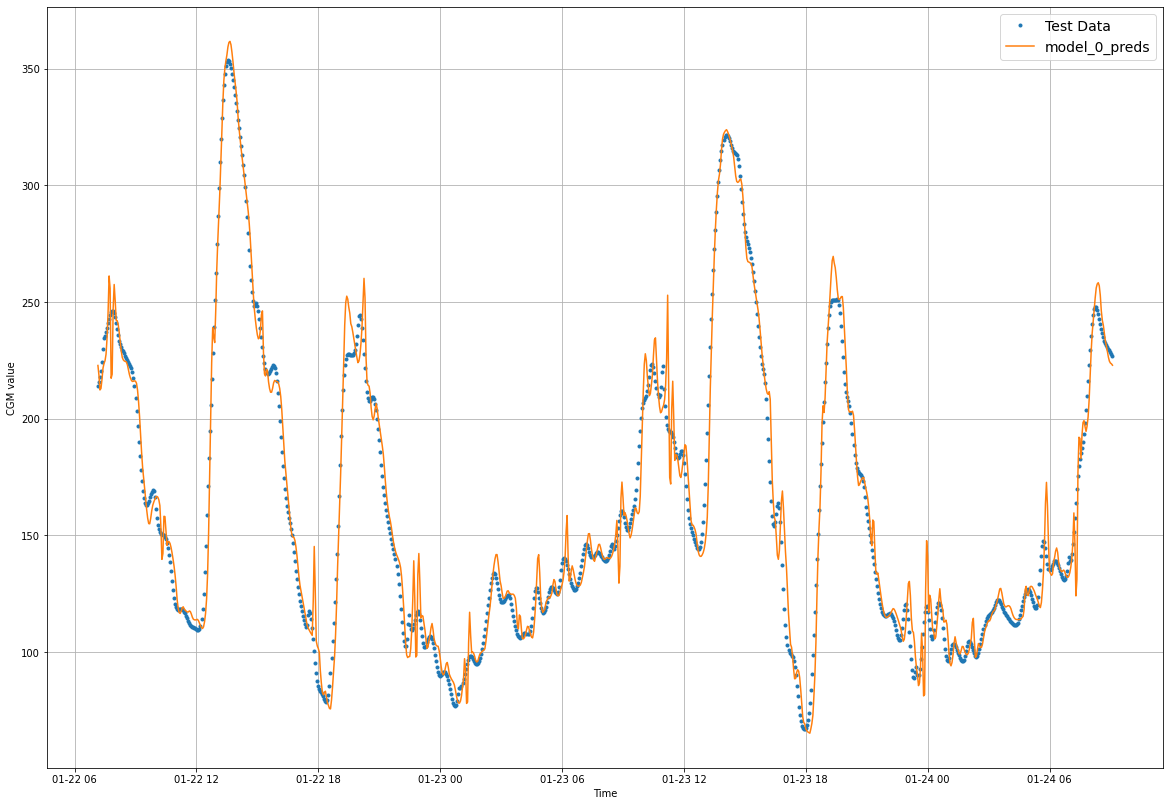

In [60]:
# Plot model 0 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_0_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_0_preds")

## Evaluation 1-9(mean 9)

In [61]:
# Load in saved best performing model_1_9 and evaluate on test data
model_1_9 = tf.keras.models.load_model("model_experiments/model_1_9_dense/")
model_1_9.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.3621 - mae: 8.3621 - mse: 135.1884


[8.362095832824707, 8.362095832824707, 135.1884002685547]

In [62]:
# predict #adult010 using model_1_9
model_1_9_preds = make_preds(model_1_9, test_windows_60d_no10)
len(model_1_9_preds), model_1_9_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.50168, 157.33759, 162.52586, 167.70158, 172.35522, 176.33281,
        179.65868, 182.2616 , 183.98683, 184.66232], dtype=float32)>)

In [63]:
# Evaluate preds
model_1_9_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_1_9_preds)
model_1_9_results

{'mae': 8.362097, 'mape': 5.354117, 'mse': 135.18842, 'rmse': 11.627055}

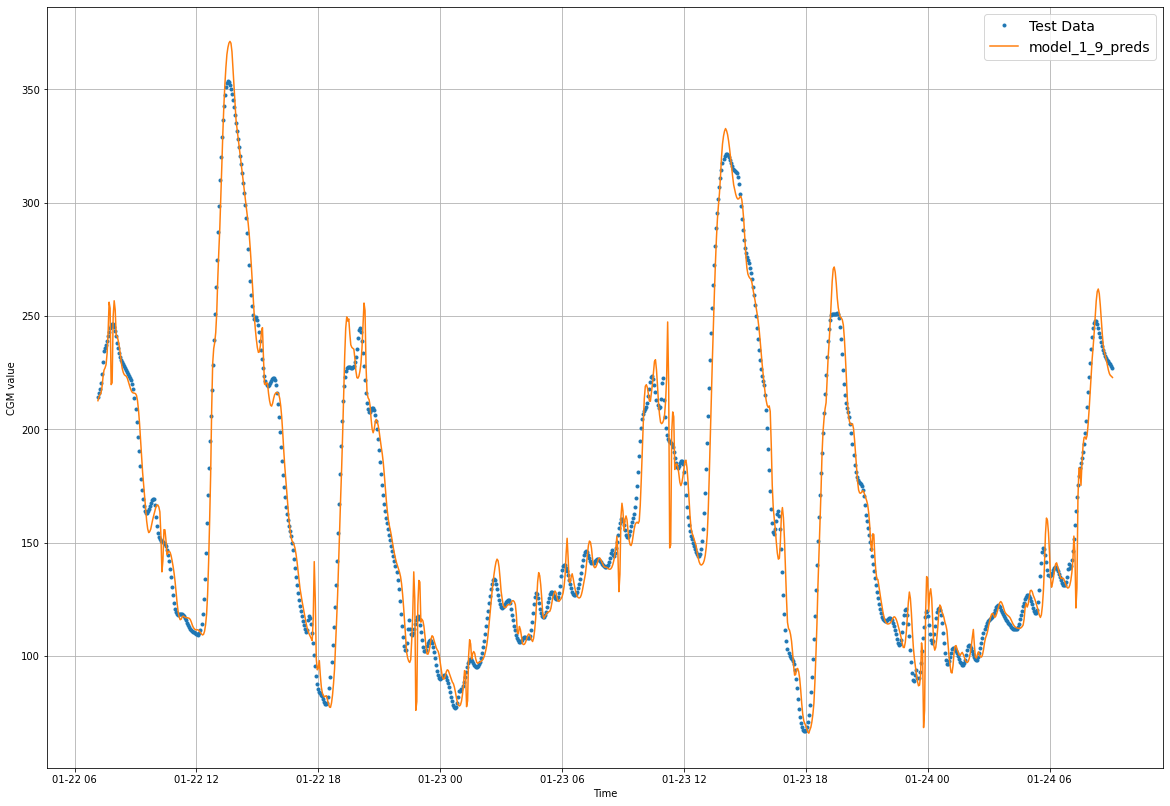

In [64]:
# Plot model_1_9 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_1_9_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_9_preds")

## Evaluation 1-7(mean 7)

In [65]:
# Load in saved best performing model_1_7 and evaluate on test data
model_1_7 = tf.keras.models.load_model("model_experiments/model_1_7_dense/")
model_1_7.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.1986 - mae: 8.1986 - mse: 131.8329


[8.198638916015625, 8.198638916015625, 131.83287048339844]

In [66]:
# predict #adult010 using model_1_7
model_1_7_preds = make_preds(model_1_7, test_windows_60d_no10)
len(model_1_7_preds), model_1_7_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.44633, 156.9481 , 161.84955, 166.76733, 171.16795, 174.91266,
        178.05554, 180.53502, 182.19426, 182.85748], dtype=float32)>)

In [67]:
# Evaluate preds
model_1_7_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_1_7_preds)
model_1_7_results

{'mae': 8.198641, 'mape': 5.251255, 'mse': 131.83281, 'rmse': 11.481847}

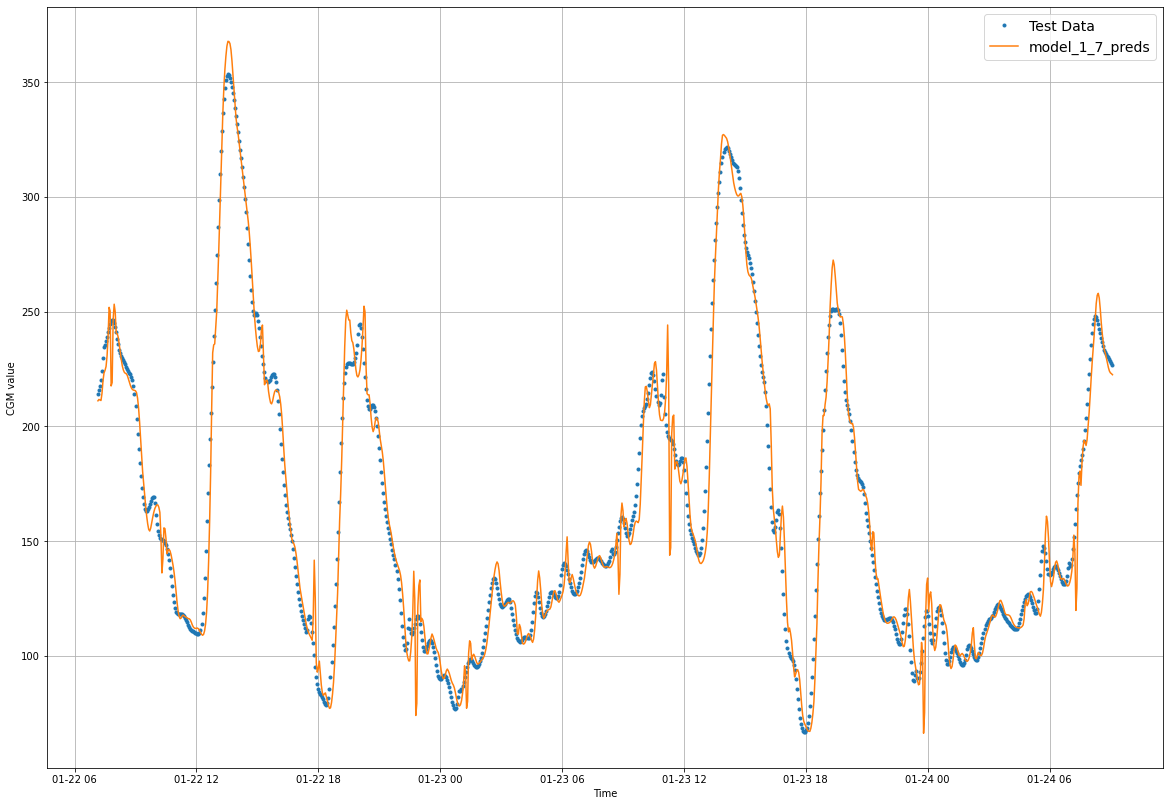

In [68]:
# Plot model_1_7 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_1_7_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_7_preds")

## Evaluation 1-6(mean 6)

In [69]:
# Load in saved best performing model_1 and evaluate on test data
model_1_6 = tf.keras.models.load_model("model_experiments/model_1_6_dense/")
model_1_6.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.1768 - mae: 8.1768 - mse: 131.8368


[8.176809310913086, 8.176809310913086, 131.83680725097656]

In [70]:
# predict #adult010 using model_1_6
model_1_6_preds = make_preds(model_1_6, test_windows_60d_no10)
len(model_1_6_preds), model_1_6_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([150.18083, 154.60588, 159.84068, 165.0104 , 169.5944 , 173.4357 ,
        176.57594, 178.9548 , 180.42174, 180.77428], dtype=float32)>)

In [71]:
# Evaluate preds
model_1_6_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_1_6_preds)
model_1_6_results

{'mae': 8.176807, 'mape': 5.2364078, 'mse': 131.83679, 'rmse': 11.48202}

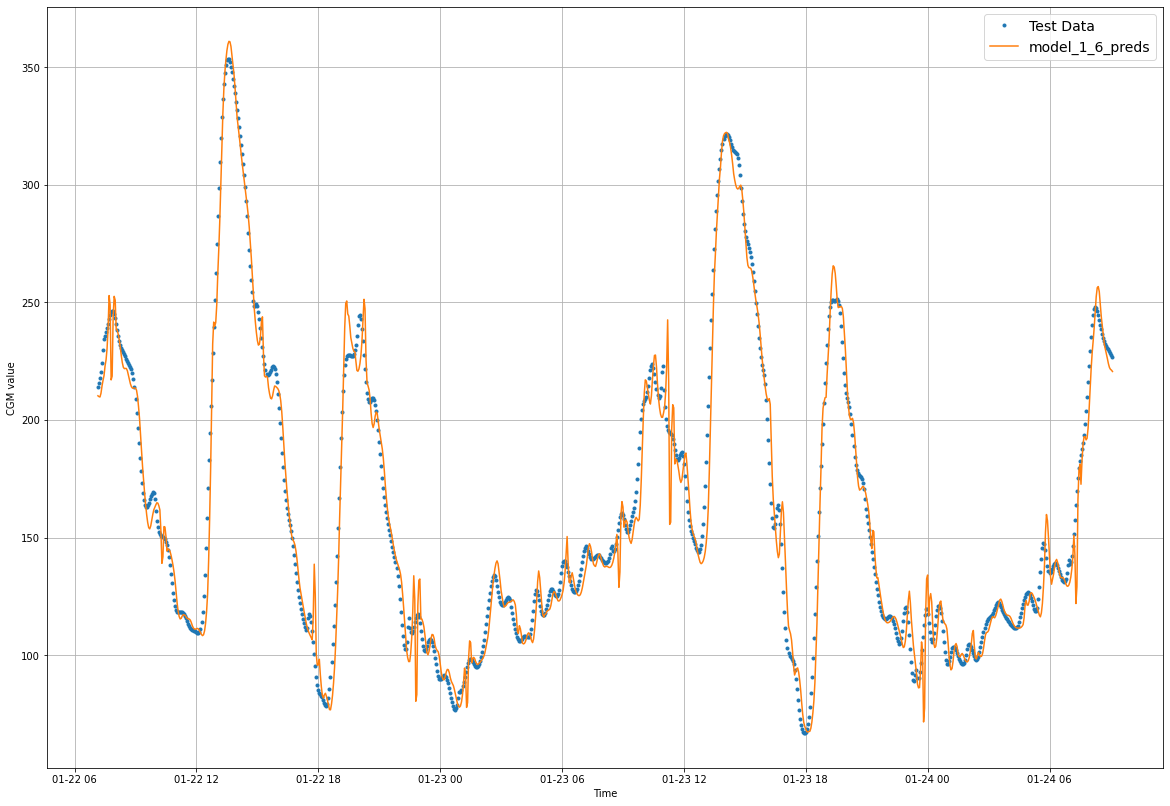

In [72]:
# Plot model_1_6 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_1_6_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_6_preds")

## Evaluation 1-5(mean 5)

In [73]:
# Load in saved best performing model_1 and evaluate on test data
model_1_5 = tf.keras.models.load_model("model_experiments/model_1_5_dense/")
model_1_5.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.1788 - mae: 8.1788 - mse: 130.6352


[8.178775787353516, 8.178775787353516, 130.6352081298828]

In [74]:
# predict #adult010 using model_1_5
model_1_5_preds = make_preds(model_1_5, test_windows_60d_no10)
len(model_1_5_preds), model_1_5_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([153.21541, 158.12617, 163.29861, 168.36456, 172.70592, 176.2791 ,
        179.15152, 181.26468, 182.75523, 183.49799], dtype=float32)>)

In [75]:
# Evaluate preds
model_1_5_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_1_5_preds)
model_1_5_results

{'mae': 8.178777, 'mape': 5.287969, 'mse': 130.63521, 'rmse': 11.429576}

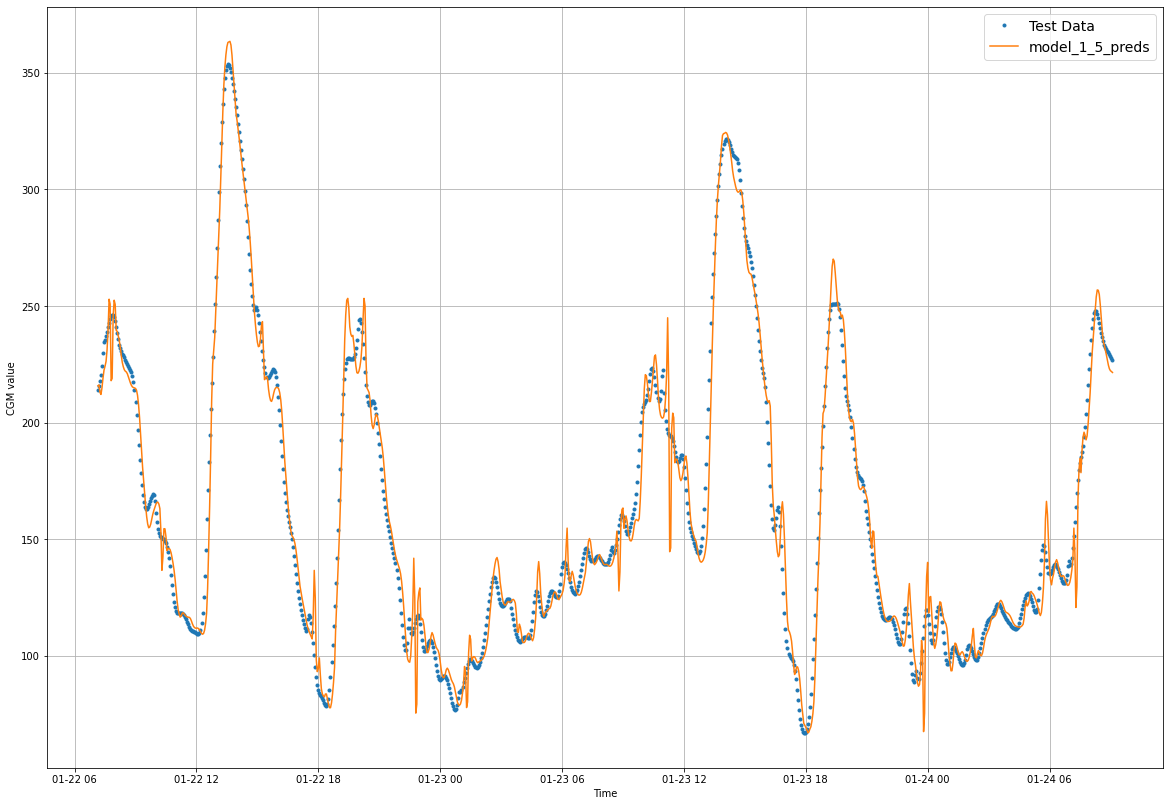

In [76]:
# Plot model_1_6 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_1_5_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_5_preds")

## Evaluation 1-3(mean 3)

In [77]:
# Load in saved best performing model_1 and evaluate on test data
model_1_3 = tf.keras.models.load_model("model_experiments/model_1_3_dense/")
model_1_3.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.2966 - mae: 8.2966 - mse: 135.8956


[8.29655933380127, 8.29655933380127, 135.89564514160156]

In [78]:
# predict #adult010 using model_1_3
model_1_3_preds = make_preds(model_1_3, test_windows_60d_no10)
len(model_1_3_preds), model_1_3_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.29276, 156.70215, 161.45197, 166.22939, 170.54472, 174.3065 ,
        177.41711, 179.85371, 181.55289, 182.30206], dtype=float32)>)

In [79]:
# Evaluate preds
model_1_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_1_3_preds)
model_1_3_results

{'mae': 8.296557, 'mape': 5.339868, 'mse': 135.89563, 'rmse': 11.657428}

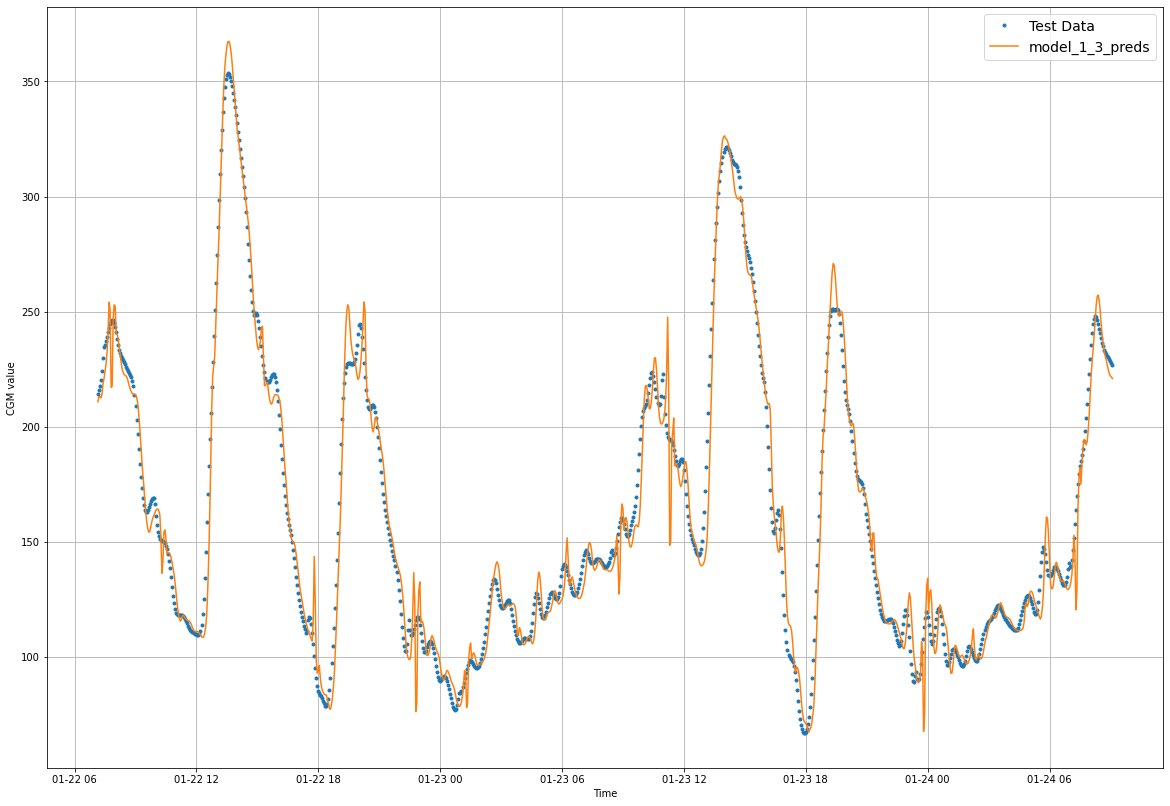

In [80]:
# Plot model_1_3 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_1_3_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_3_preds")

## Evaluation 2-9(mean 9)

In [81]:
# Load in saved best performing model_2_9 and evaluate on test data
model_2_9 = tf.keras.models.load_model("model_experiments/model_2_9_dense/")
model_2_9.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.3847 - mae: 8.3847 - mse: 138.1631


[8.384713172912598, 8.384713172912598, 138.16314697265625]

In [82]:
# predict #adult010 using model_2_9
model_2_9_preds = make_preds(model_2_9, test_windows_60d_no10)
len(model_2_9_preds), model_2_9_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.59705, 157.16144, 162.14923, 167.15335, 171.46512, 175.22113,
        178.41139, 180.96123, 182.74194, 183.6888 ], dtype=float32)>)

In [83]:
# Evaluate preds
model_2_9_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_2_9_preds)
model_2_9_results

{'mae': 8.384715, 'mape': 5.330836, 'mse': 138.1632, 'rmse': 11.754284}

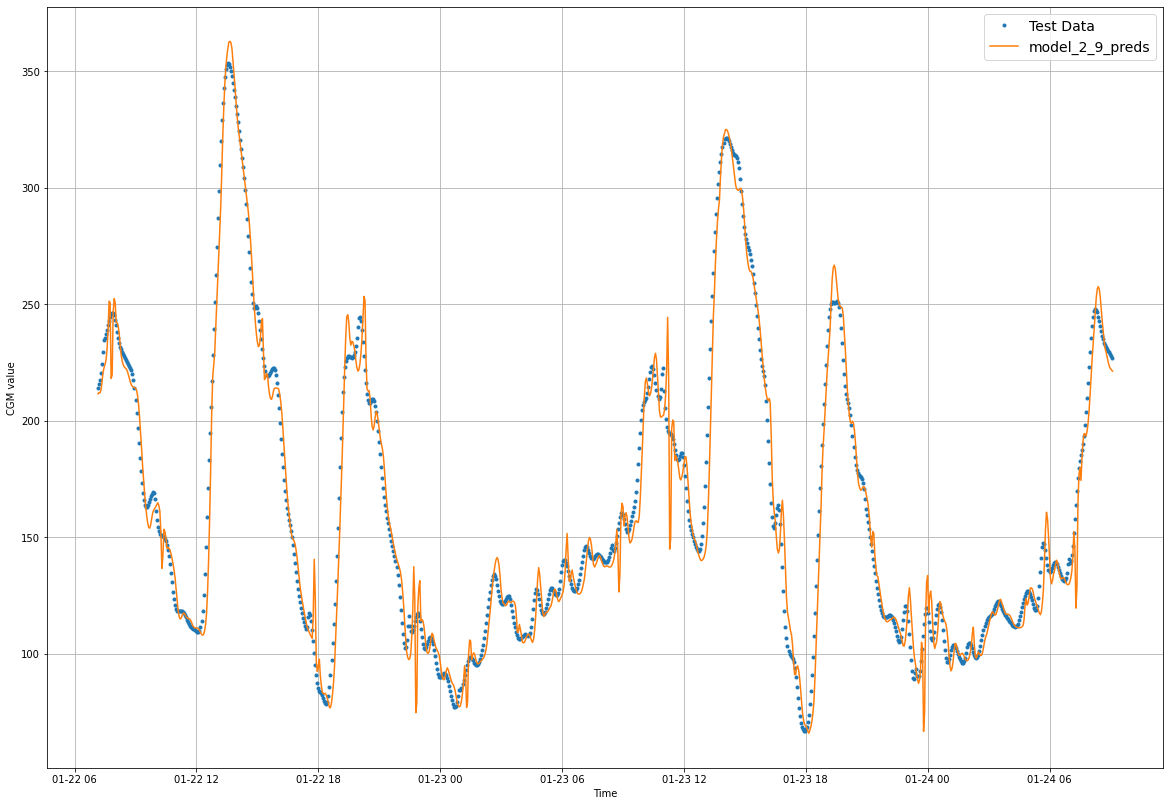

In [84]:
# Plot model_2_9 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_2_9_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_9_preds")

## Evaluation 2-7(mean 7)

In [85]:
# Load in saved best performing model_2_9 and evaluate on test data
model_2_7 = tf.keras.models.load_model("model_experiments/model_2_7_dense/")
model_2_7.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.2567 - mae: 8.2567 - mse: 134.5405


[8.25671672821045, 8.25671672821045, 134.5404815673828]

In [86]:
# predict #adult010 using model_2_7
model_2_7_preds = make_preds(model_2_7, test_windows_60d_no10)
len(model_2_7_preds), model_2_7_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([151.23442, 155.90532, 160.8916 , 165.8702 , 170.32027, 174.10529,
        177.26996, 179.74661, 181.38324, 182.01103], dtype=float32)>)

In [87]:
# Evaluate preds
model_2_7_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_2_7_preds)
model_2_7_results

{'mae': 8.256718, 'mape': 5.2931914, 'mse': 134.54048, 'rmse': 11.599158}

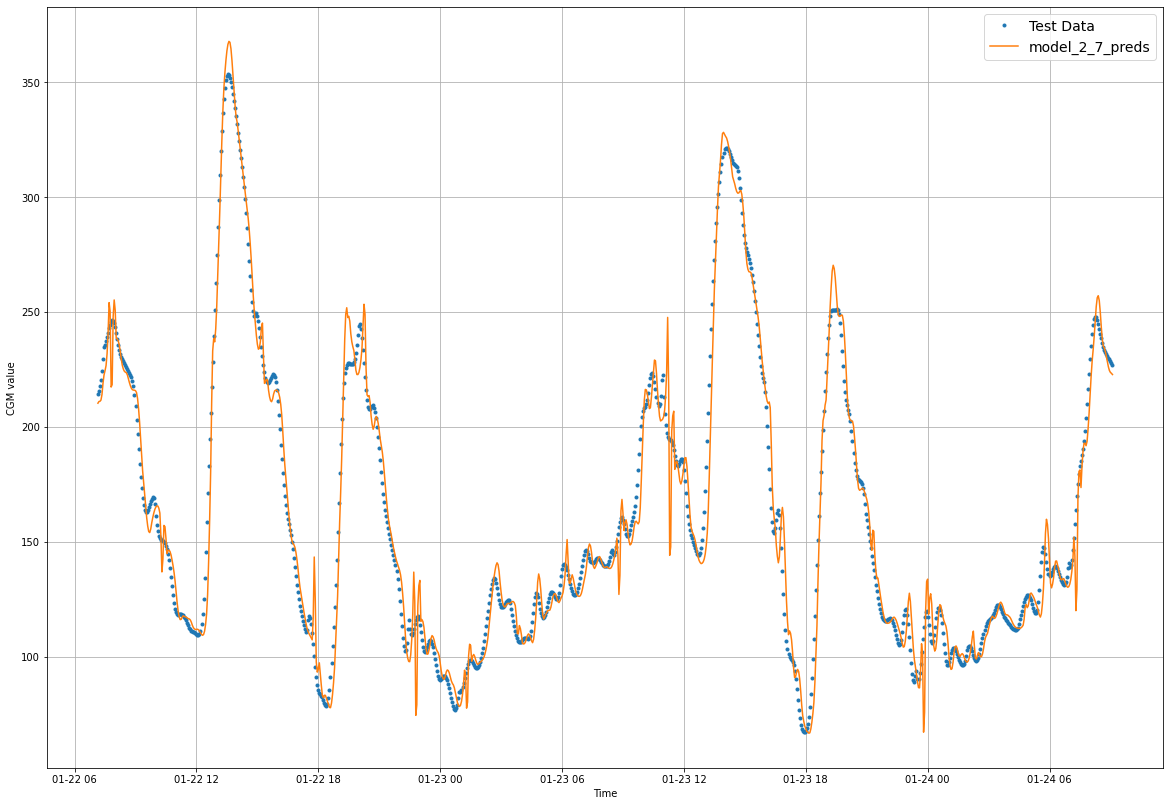

In [88]:
# Plot model_2_7 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_2_7_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_7_preds")

## Evaluation 2-6(mean 6)

In [89]:
# Load in saved best performing model_2_6 and evaluate on test data
model_2_6 = tf.keras.models.load_model("model_experiments/model_2_6_dense/")
model_2_6.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.1272 - mae: 8.1272 - mse: 127.8277


[8.127213478088379, 8.127213478088379, 127.82768249511719]

In [90]:
# predict #adult010 using model_2_6
model_2_6_preds = make_preds(model_2_6, test_windows_60d_no10)
len(model_2_6_preds), model_2_6_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.43669, 157.24467, 162.58481, 167.93184, 172.51663, 176.20166,
        179.25352, 181.61191, 183.0776 , 183.23073], dtype=float32)>)

In [91]:
# Evaluate preds
model_2_6_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_2_6_preds)
model_2_6_results

{'mae': 8.127215, 'mape': 5.208217, 'mse': 127.82772, 'rmse': 11.306092}

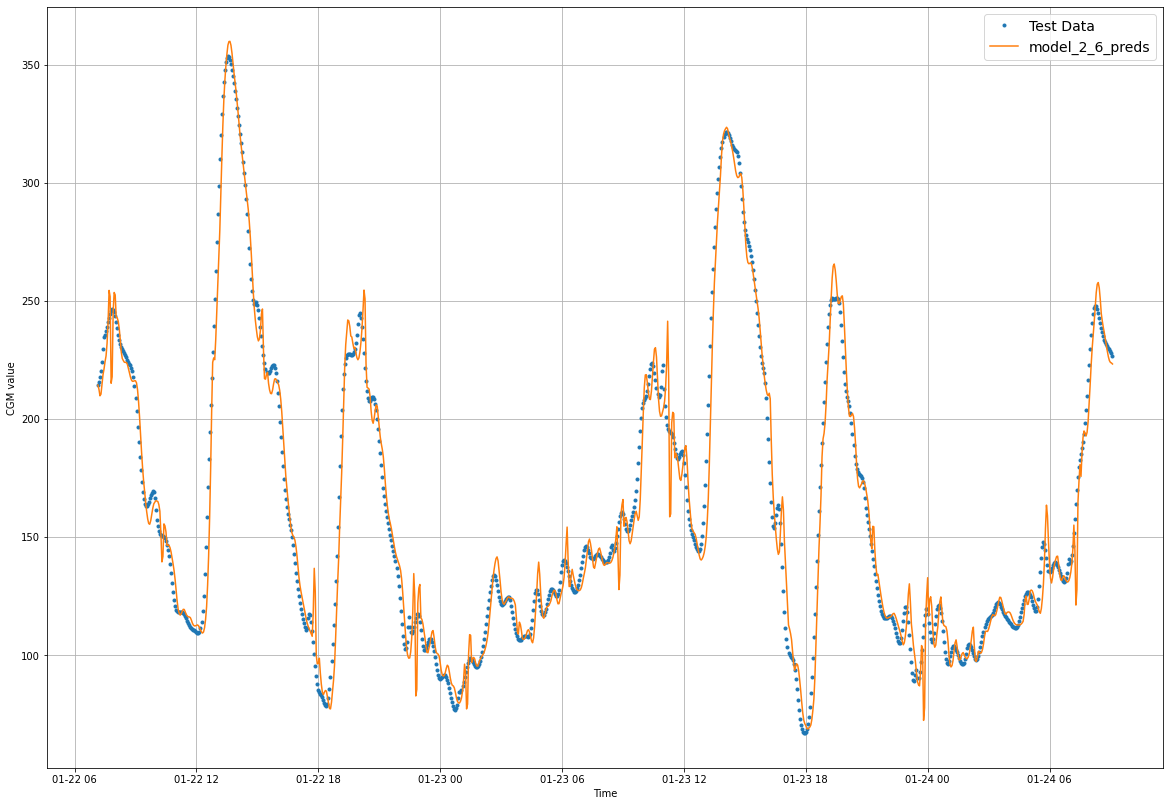

In [92]:
# Plot model_2_6 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_2_6_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_6_preds")

## Evaluation 2-5(mean 5)

In [93]:
# Load in saved best performing model_1 and evaluate on test data
model_2_5 = tf.keras.models.load_model("model_experiments/model_2_5_dense/")
model_2_5.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.2844 - mae: 8.2844 - mse: 135.1891


[8.28443431854248, 8.28443431854248, 135.1891326904297]

In [94]:
# predict #adult010 using model_2_5
model_2_5_preds = make_preds(model_2_5, test_windows_60d_no10)
len(model_2_5_preds), model_2_5_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([152.27904, 156.94814, 162.066  , 167.13107, 171.63799, 175.42595,
        178.51665, 180.84564, 182.27213, 183.06866], dtype=float32)>)

In [95]:
# Evaluate preds
model_2_5_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_2_5_preds)
model_2_5_results

{'mae': 8.2844305, 'mape': 5.3328505, 'mse': 135.18915, 'rmse': 11.627087}

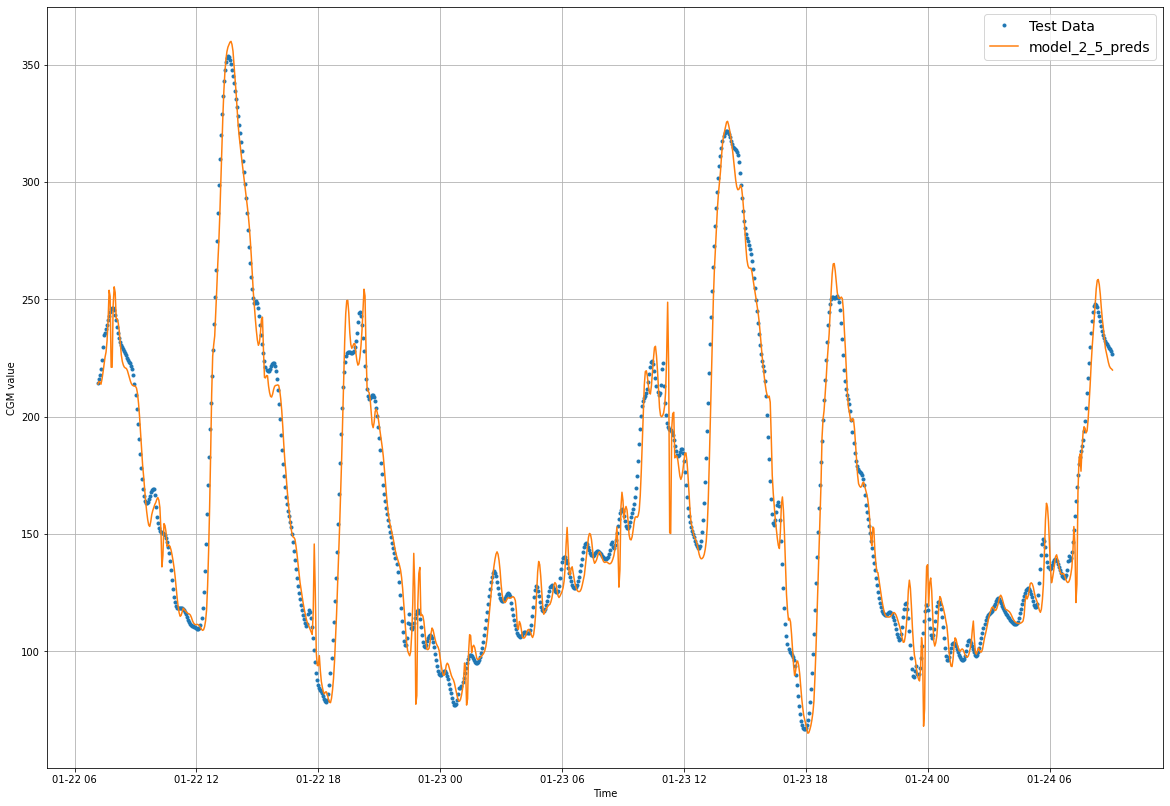

In [96]:
# Plot model_2_5 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_2_5_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_5_preds")

## Evaluation 2-3(mean 3)

In [97]:
# Load in saved best performing model_2_3 and evaluate on test data
model_2_3 = tf.keras.models.load_model("model_experiments/model_2_3_dense/")
model_2_3.evaluate(test_windows_60d_no10, test_labels_60d_no10)

180/180 [==============================] - 0s 2ms/step - loss: 8.2353 - mae: 8.2353 - mse: 132.5073


[8.235260009765625, 8.235260009765625, 132.50733947753906]

In [98]:
# predict #adult010 using model_1_3
model_2_3_preds = make_preds(model_2_3, test_windows_60d_no10)
len(model_2_3_preds), model_2_3_preds[:10]

(5758, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([151.71532, 156.18018, 161.14723, 166.16391, 170.6    , 174.31503,
        177.40482, 179.82564, 181.4051 , 181.9461 ], dtype=float32)>)

In [99]:
# Evaluate preds
model_2_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_60d_no10), # reduce to right shape
                                 y_pred=model_2_3_preds)
model_2_3_results

{'mae': 8.235258, 'mape': 5.2832475, 'mse': 132.50734, 'rmse': 11.511183}

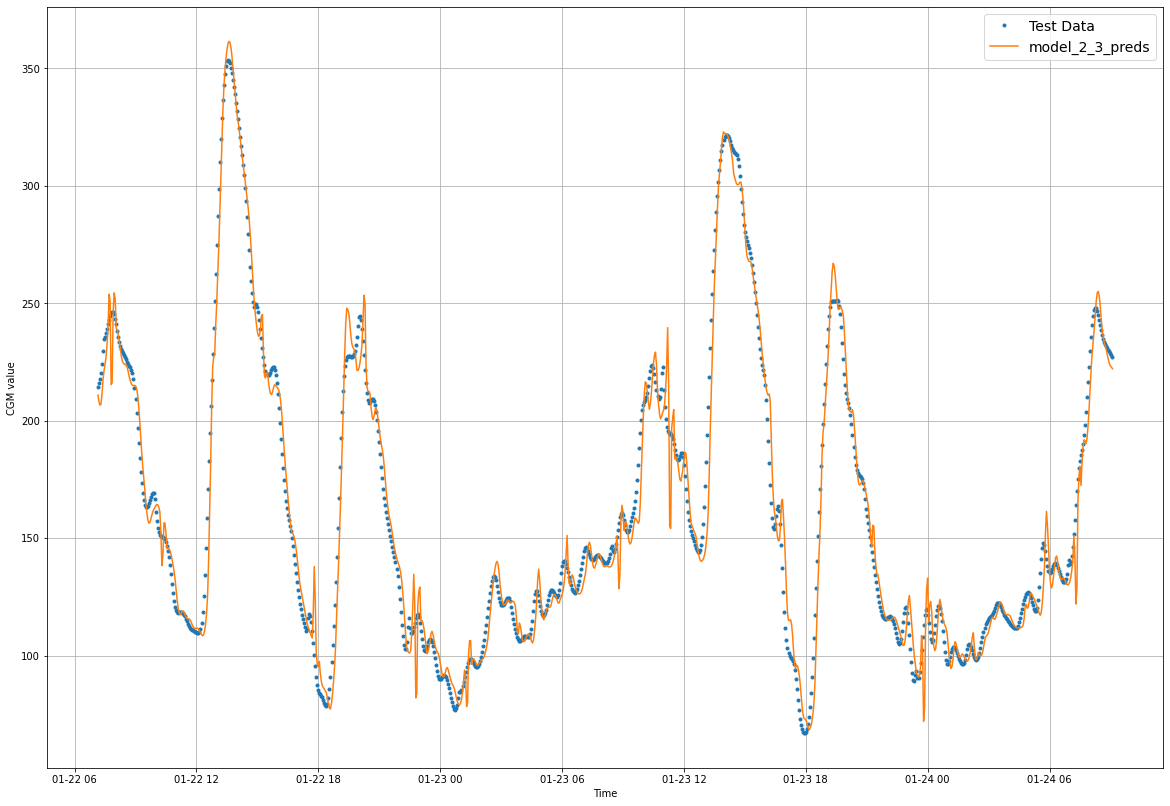

In [100]:
# Plot model_2_3 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=test_labels_60d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_60d_no10[-len(test_windows_60d_no10):],
                 values=model_2_3_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_3_preds")

# scenario 2: use 7 days cgm data (of 60 days)

In [101]:
train_windows_7d_m9, val_windows_7d_m9, test_windows_7d_m9, train_labels_7d_m9, val_labels_7d_m9, test_labels_7d_m9 = train_windows_60d_m9[-3360:], val_windows_60d_m9[-3360:], test_windows_60d_m9[-3360:], train_labels_60d_m9[-3360:], val_labels_60d_m9[-3360:], test_labels_60d_m9[-3360:]

In [102]:
train_windows_7d_m7, val_windows_7d_m7, test_windows_7d_m7, train_labels_7d_m7, val_labels_7d_m7, test_labels_7d_m7 = train_windows_60d_m7[-3360:], val_windows_60d_m7[-3360:], test_windows_60d_m7[-3360:], train_labels_60d_m7[-3360:], val_labels_60d_m7[-3360:], test_labels_60d_m7[-3360:]

In [103]:
train_windows_7d_m6, val_windows_7d_m6, test_windows_7d_m6, train_labels_7d_m6, val_labels_7d_m6, test_labels_7d_m6 = train_windows_60d_m6[-3360:], val_windows_60d_m6[-3360:], test_windows_60d_m6[-3360:], train_labels_60d_m6[-3360:], val_labels_60d_m6[-3360:], test_labels_60d_m6[-3360:]

In [104]:
train_windows_7d_m5, val_windows_7d_m5, test_windows_7d_m5, train_labels_7d_m5, val_labels_7d_m5, test_labels_7d_m5 = train_windows_60d_m5[-3360:], val_windows_60d_m5[-3360:], test_windows_60d_m5[-3360:], train_labels_60d_m5[-3360:], val_labels_60d_m5[-3360:], test_labels_60d_m5[-3360:]

In [105]:
train_windows_7d_m3, val_windows_7d_m3, test_windows_7d_m3, train_labels_7d_m3, val_labels_7d_m3, test_labels_7d_m3 = train_windows_60d_m3[-3360:], val_windows_60d_m3[-3360:], test_windows_60d_m3[-3360:], train_labels_60d_m9[-3360:], val_labels_60d_m3[-3360:], test_labels_60d_m3[-3360:]

In [106]:
train_windows_7d_no10, val_windows_7d_no10, test_windows_7d_no10, train_labels_7d_no10, val_labels_7d_no10, test_labels_7d_no10 = train_windows_60d_no10[-3360:], val_windows_60d_no10[-3360:], test_windows_60d_no10[-3360:], train_labels_60d_no10[-3360:], val_labels_60d_no10[-3360:], test_labels_60d_no10[-3360:]

In [107]:
x_test_7d_no10, x_test_7d_m9, x_test_7d_m6, x_test_7d_m5, x_test_7d_m3 = x_test_60d_no10[-3360:], x_test_60d_m9[-3360:], x_test_60d_m6[-3360:], x_test_60d_m5[-3360:], x_test_60d_m3[-3360:]

## Experiment 0(no 10)
* Use the no010 cgm training a model
* Validated by no010 cgm data
* Test on no010 cgm



In [108]:
import tensorflow as tf
from tensorflow.keras import layers

In [109]:
tf.random.set_seed(21)
model_0 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_0_dense")

model_0.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_0.fit(x=train_windows_7d_no10,
            y=train_labels_7d_no10,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_no10, val_labels_7d_no10),
            callbacks=[create_model_checkpoint(model_name=model_0.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 40ms/step - loss: 87.1966 - mae: 87.1966 - mse: 12661.9619 - val_loss: 27.6061 - val_mae: 27.6061 - val_mse: 1246.4520
Epoch 2/200
27/27 [==============================] - 1s 26ms/step - loss: 19.3078 - mae: 19.3078 - mse: 799.8339 - val_loss: 18.7237 - val_mae: 18.7237 - val_mse: 754.4680
Epoch 3/200
27/27 [==============================] - 1s 28ms/step - loss: 16.7602 - mae: 16.7602 - mse: 615.4325 - val_loss: 17.0583 - val_mae: 17.0583 - val_mse: 606.3672
Epoch 4/200
27/27 [==============================] - 1s 26ms/step - loss: 14.6381 - mae: 14.6381 - mse: 458.1938 - val_loss: 15.3220 - val_mae: 15.3220 - val_mse: 481.8138
Epoch 5/200
27/27 [==============================] - 1s 26ms/step - loss: 13.8821 - mae: 13.8821 - mse: 382.0309 - val_loss: 13.9155 - val_mae: 13.9155 - val_mse: 383.9027
Epoch 6/200
27/27 [==============================] - 1s 26ms/step - loss: 12.8107 - mae: 12.8107 - mse: 321.7999 - val_loss: 13.4974 - va

## Experiment 1-9(mean 9)
* Use the the mean of 9 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm



In [110]:
tf.random.set_seed(21)
model_1_9 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_9_dense")

model_1_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_9.fit(x=train_windows_7d_m9,
            y=train_labels_7d_m9,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_no10, val_labels_7d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_9.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 30ms/step - loss: 74.7558 - mae: 74.7558 - mse: 8885.8320 - val_loss: 30.9364 - val_mae: 30.9364 - val_mse: 1514.7708
Epoch 2/200
27/27 [==============================] - 1s 27ms/step - loss: 14.6087 - mae: 14.6087 - mse: 397.6964 - val_loss: 20.1305 - val_mae: 20.1305 - val_mse: 879.1783
Epoch 3/200
27/27 [==============================] - 1s 26ms/step - loss: 12.5256 - mae: 12.5256 - mse: 310.7331 - val_loss: 20.0381 - val_mae: 20.0381 - val_mse: 817.5959
Epoch 4/200
27/27 [==============================] - 1s 26ms/step - loss: 12.2751 - mae: 12.2751 - mse: 297.4085 - val_loss: 19.2653 - val_mae: 19.2653 - val_mse: 781.6749
Epoch 5/200
27/27 [==============================] - 1s 26ms/step - loss: 11.8085 - mae: 11.8085 - mse: 270.8107 - val_loss: 17.6988 - val_mae: 17.6988 - val_mse: 662.2933
Epoch 6/200
27/27 [==============================] - 1s 26ms/step - loss: 11.0161 - mae: 11.0161 - mse: 235.1149 - val_loss: 16.6108 - val

## Experiment 1-7(mean 7)
* Use the the mean of 7 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm



In [111]:
tf.random.set_seed(21)
model_1_7 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_7_dense")

model_1_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_7.fit(x=train_windows_7d_m7,
            y=train_labels_7d_m7,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_no10, val_labels_7d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_7.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 30ms/step - loss: 81.9202 - mae: 81.9202 - mse: 10741.4775 - val_loss: 30.3234 - val_mae: 30.3234 - val_mse: 1464.2207
Epoch 2/200
27/27 [==============================] - 1s 38ms/step - loss: 16.3555 - mae: 16.3555 - mse: 505.3082 - val_loss: 20.1483 - val_mae: 20.1483 - val_mse: 879.2099
Epoch 3/200
27/27 [==============================] - 1s 25ms/step - loss: 14.2237 - mae: 14.2237 - mse: 403.3880 - val_loss: 19.9652 - val_mae: 19.9652 - val_mse: 812.5656
Epoch 4/200
27/27 [==============================] - 1s 26ms/step - loss: 13.8819 - mae: 13.8819 - mse: 382.0529 - val_loss: 18.8274 - val_mae: 18.8274 - val_mse: 737.6888
Epoch 5/200
27/27 [==============================] - 1s 27ms/step - loss: 12.9904 - mae: 12.9904 - mse: 327.1094 - val_loss: 17.0355 - val_mae: 17.0355 - val_mse: 614.3313
Epoch 6/200
27/27 [==============================] - 1s 25ms/step - loss: 12.1661 - mae: 12.1661 - mse: 283.0740 - val_loss: 15.8615 - va

## Experiment 1-6(mean 6)
* Use the the mean of 6 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm

In [112]:
tf.random.set_seed(21)
model_1_6 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_6_dense")

model_1_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_6.fit(x=train_windows_7d_m6,
            y=train_labels_7d_m6,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_no10, val_labels_7d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_6.name)]
            )

Epoch 1/200
27/27 [==============================] - 2s 42ms/step - loss: 80.1416 - mae: 80.1416 - mse: 10324.3262 - val_loss: 30.2085 - val_mae: 30.2085 - val_mse: 1454.8025
Epoch 2/200
27/27 [==============================] - 1s 26ms/step - loss: 16.4514 - mae: 16.4514 - mse: 516.7130 - val_loss: 20.1137 - val_mae: 20.1137 - val_mse: 871.6093
Epoch 3/200
27/27 [==============================] - 1s 26ms/step - loss: 14.3350 - mae: 14.3350 - mse: 415.4545 - val_loss: 19.7550 - val_mae: 19.7550 - val_mse: 809.0847
Epoch 4/200
27/27 [==============================] - 1s 26ms/step - loss: 13.9979 - mae: 13.9979 - mse: 391.2634 - val_loss: 19.0202 - val_mae: 19.0202 - val_mse: 761.3636
Epoch 5/200
27/27 [==============================] - 1s 27ms/step - loss: 13.1310 - mae: 13.1310 - mse: 337.7957 - val_loss: 16.9825 - val_mae: 16.9825 - val_mse: 611.4583
Epoch 6/200
27/27 [==============================] - 1s 27ms/step - loss: 12.2082 - mae: 12.2082 - mse: 286.6237 - val_loss: 15.7041 - va

## Experiment 1-5(mean 5)
* Use the the mean of 5 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm

In [113]:
tf.random.set_seed(21)
model_1_5 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_5_dense")

model_1_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_5.fit(x=train_windows_7d_m5,
            y=train_labels_7d_m5,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_no10, val_labels_7d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_5.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 30ms/step - loss: 81.7504 - mae: 81.7504 - mse: 10774.7812 - val_loss: 30.1486 - val_mae: 30.1486 - val_mse: 1449.8976
Epoch 2/200
27/27 [==============================] - 1s 40ms/step - loss: 16.9080 - mae: 16.9080 - mse: 559.1260 - val_loss: 20.0880 - val_mae: 20.0880 - val_mse: 869.6231
Epoch 3/200
27/27 [==============================] - 1s 27ms/step - loss: 14.7986 - mae: 14.7986 - mse: 454.1229 - val_loss: 19.3869 - val_mae: 19.3869 - val_mse: 779.2066
Epoch 4/200
27/27 [==============================] - 1s 27ms/step - loss: 14.1283 - mae: 14.1283 - mse: 405.9198 - val_loss: 18.0058 - val_mae: 18.0058 - val_mse: 677.1346
Epoch 5/200
27/27 [==============================] - 1s 26ms/step - loss: 13.1748 - mae: 13.1748 - mse: 347.1351 - val_loss: 16.7205 - val_mae: 16.7205 - val_mse: 592.3513
Epoch 6/200
27/27 [==============================] - 1s 26ms/step - loss: 12.4327 - mae: 12.4327 - mse: 304.1464 - val_loss: 15.5568 - va

## Experiment 1-3(mean 3)
* Use the the mean of 3 cgm training a model
* Validated by the no 10 cgm
* Test on the no 10 cgm

In [114]:
tf.random.set_seed(21)
model_1_3 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_1_3_dense")

model_1_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1_3.fit(x=train_windows_7d_m3,
            y=train_labels_7d_m3,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_no10, val_labels_7d_no10),
            callbacks=[create_model_checkpoint(model_name=model_1_3.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 31ms/step - loss: 72.6939 - mae: 72.6939 - mse: 8567.7988 - val_loss: 22.4995 - val_mae: 22.4995 - val_mse: 950.6686
Epoch 2/200
27/27 [==============================] - 1s 27ms/step - loss: 15.7044 - mae: 15.7044 - mse: 413.9914 - val_loss: 22.3701 - val_mae: 22.3701 - val_mse: 1078.6500
Epoch 3/200
27/27 [==============================] - 1s 26ms/step - loss: 14.1393 - mae: 14.1393 - mse: 337.6722 - val_loss: 21.1899 - val_mae: 21.1899 - val_mse: 975.9815
Epoch 4/200
27/27 [==============================] - 1s 25ms/step - loss: 13.7881 - mae: 13.7881 - mse: 320.0759 - val_loss: 20.5935 - val_mae: 20.5935 - val_mse: 907.9691
Epoch 5/200
27/27 [==============================] - 1s 25ms/step - loss: 13.1703 - mae: 13.1703 - mse: 287.5753 - val_loss: 19.7455 - val_mae: 19.7455 - val_mse: 816.5955
Epoch 6/200
27/27 [==============================] - 1s 26ms/step - loss: 12.4627 - mae: 12.4627 - mse: 256.5733 - val_loss: 19.4907 - val

## Experiment 2-9(mean 9)
* Use the the mean of 9 cgm training a model
* Validated by the mean of 9 cgm
* Test on the no 10 cgm

In [115]:
tf.random.set_seed(21)
model_2_9 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_9_dense")

model_2_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_9.fit(x=train_windows_7d_m9,
            y=train_labels_7d_m9,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_m9, val_labels_7d_m9),
            callbacks=[create_model_checkpoint(model_name=model_2_9.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 30ms/step - loss: 74.7558 - mae: 74.7558 - mse: 8885.8320 - val_loss: 22.7829 - val_mae: 22.7829 - val_mse: 765.3749
Epoch 2/200
27/27 [==============================] - 1s 26ms/step - loss: 14.6087 - mae: 14.6087 - mse: 397.6964 - val_loss: 13.8235 - val_mae: 13.8235 - val_mse: 378.7755
Epoch 3/200
27/27 [==============================] - 1s 26ms/step - loss: 12.5256 - mae: 12.5256 - mse: 310.7331 - val_loss: 13.4601 - val_mae: 13.4601 - val_mse: 340.7778
Epoch 4/200
27/27 [==============================] - 1s 41ms/step - loss: 12.2751 - mae: 12.2751 - mse: 297.4085 - val_loss: 13.1340 - val_mae: 13.1340 - val_mse: 333.8098
Epoch 5/200
27/27 [==============================] - 1s 25ms/step - loss: 11.8085 - mae: 11.8085 - mse: 270.8107 - val_loss: 12.2948 - val_mae: 12.2948 - val_mse: 290.4536
Epoch 6/200
27/27 [==============================] - 1s 26ms/step - loss: 11.0161 - mae: 11.0161 - mse: 235.1149 - val_loss: 11.7569 - val_

## Experiment 2-7(mean 7)
* Use the the mean of 7 cgm training a model
* Validated by the mean of 7 cgm
* Test on the no 10 cgm

In [116]:
tf.random.set_seed(21)
model_2_7 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_7_dense")

model_2_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_7.fit(x=train_windows_7d_m7,
            y=train_labels_7d_m7,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_m7, val_labels_7d_m7),
            callbacks=[create_model_checkpoint(model_name=model_2_7.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 32ms/step - loss: 81.9202 - mae: 81.9202 - mse: 10741.4775 - val_loss: 24.7774 - val_mae: 24.7774 - val_mse: 919.2946
Epoch 2/200
27/27 [==============================] - 1s 27ms/step - loss: 16.3555 - mae: 16.3555 - mse: 505.3082 - val_loss: 15.6154 - val_mae: 15.6154 - val_mse: 485.8038
Epoch 3/200
27/27 [==============================] - 1s 26ms/step - loss: 14.2237 - mae: 14.2237 - mse: 403.3880 - val_loss: 15.2211 - val_mae: 15.2211 - val_mse: 437.2426
Epoch 4/200
27/27 [==============================] - 1s 26ms/step - loss: 13.8819 - mae: 13.8819 - mse: 382.0529 - val_loss: 14.5461 - val_mae: 14.5461 - val_mse: 405.9636
Epoch 5/200
27/27 [==============================] - 1s 25ms/step - loss: 12.9904 - mae: 12.9904 - mse: 327.1094 - val_loss: 13.5848 - val_mae: 13.5848 - val_mse: 354.3336
Epoch 6/200
27/27 [==============================] - 1s 26ms/step - loss: 12.1661 - mae: 12.1661 - mse: 283.0740 - val_loss: 12.7739 - val

## Experiment 2-6(mean 6)
* Use the the mean of 6 cgm training a model
* Validated by the mean of 6 cgm
* Test on the no 10 cgm

In [117]:
tf.random.set_seed(21)
model_2_6 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_6_dense")

model_2_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_6.fit(x=train_windows_7d_m6,
            y=train_labels_7d_m6,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_m6, val_labels_7d_m6),
            callbacks=[create_model_checkpoint(model_name=model_2_6.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 30ms/step - loss: 80.1416 - mae: 80.1416 - mse: 10324.3262 - val_loss: 24.5102 - val_mae: 24.5102 - val_mse: 911.7023
Epoch 2/200
27/27 [==============================] - 1s 28ms/step - loss: 16.4514 - mae: 16.4514 - mse: 516.7130 - val_loss: 15.6507 - val_mae: 15.6507 - val_mse: 489.9404
Epoch 3/200
27/27 [==============================] - 1s 27ms/step - loss: 14.3350 - mae: 14.3350 - mse: 415.4545 - val_loss: 15.2498 - val_mae: 15.2498 - val_mse: 448.9467
Epoch 4/200
27/27 [==============================] - 1s 26ms/step - loss: 13.9979 - mae: 13.9979 - mse: 391.2634 - val_loss: 14.8597 - val_mae: 14.8597 - val_mse: 431.2638
Epoch 5/200
27/27 [==============================] - 1s 26ms/step - loss: 13.1310 - mae: 13.1310 - mse: 337.7957 - val_loss: 13.6698 - val_mae: 13.6698 - val_mse: 361.6338
Epoch 6/200
27/27 [==============================] - 1s 37ms/step - loss: 12.2082 - mae: 12.2082 - mse: 286.6237 - val_loss: 12.8335 - val

## Experiment 2-5(mean 5)
* Use the the mean of 5 cgm training a model
* Validated by the mean of 5 cgm
* Test on the no 10 cgm

In [118]:
tf.random.set_seed(21)
model_2_5 = tf.keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_5_dense")

model_2_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_5.fit(x=train_windows_7d_m5,
            y=train_labels_7d_m5,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_m5, val_labels_7d_m5),
            callbacks=[create_model_checkpoint(model_name=model_2_5.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 30ms/step - loss: 81.7504 - mae: 81.7504 - mse: 10774.7812 - val_loss: 25.3001 - val_mae: 25.3001 - val_mse: 972.1420
Epoch 2/200
27/27 [==============================] - 1s 26ms/step - loss: 16.9080 - mae: 16.9080 - mse: 559.1260 - val_loss: 16.1376 - val_mae: 16.1376 - val_mse: 531.2565
Epoch 3/200
27/27 [==============================] - 1s 25ms/step - loss: 14.7986 - mae: 14.7986 - mse: 454.1229 - val_loss: 15.5088 - val_mae: 15.5088 - val_mse: 471.4438
Epoch 4/200
27/27 [==============================] - 1s 38ms/step - loss: 14.1283 - mae: 14.1283 - mse: 405.9198 - val_loss: 14.5722 - val_mae: 14.5722 - val_mse: 417.0546
Epoch 5/200
27/27 [==============================] - 1s 26ms/step - loss: 13.1748 - mae: 13.1748 - mse: 347.1351 - val_loss: 13.9062 - val_mae: 13.9062 - val_mse: 380.3557
Epoch 6/200
27/27 [==============================] - 1s 26ms/step - loss: 12.4327 - mae: 12.4327 - mse: 304.1464 - val_loss: 13.0556 - val

## Experiment 2-3(mean 3)
* Use the the mean of 3 cgm training a model
* Validated by the mean of 3 cgm
* Test on the no 10 cgm

In [119]:
tf.random.set_seed(21)
model_2_3 = tf.keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(HORIZON) 
], name="model_2_3_dense")

model_2_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2_3.fit(x=train_windows_7d_m3,
            y=train_labels_7d_m3,
            epochs=200,
            verbose=1,
            batch_size=128,
            validation_data=(val_windows_7d_m3, val_labels_7d_m3),
            callbacks=[create_model_checkpoint(model_name=model_2_3.name)]
            )

Epoch 1/200
27/27 [==============================] - 1s 31ms/step - loss: 53.4316 - mae: 53.4316 - mse: 4516.2524 - val_loss: 17.2702 - val_mae: 17.2702 - val_mse: 519.5974
Epoch 2/200
27/27 [==============================] - 1s 26ms/step - loss: 15.5199 - mae: 15.5199 - mse: 408.6844 - val_loss: 16.1484 - val_mae: 16.1484 - val_mse: 544.5424
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 14.1647 - mae: 14.1647 - mse: 340.2541 - val_loss: 16.9172 - val_mae: 16.9172 - val_mse: 586.4181
Epoch 4/200
27/27 [==============================] - 0s 6ms/step - loss: 13.9168 - mae: 13.9168 - mse: 327.1534 - val_loss: 16.8995 - val_mae: 16.8995 - val_mse: 579.8647
Epoch 5/200
27/27 [==============================] - 0s 6ms/step - loss: 13.7232 - mae: 13.7232 - mse: 317.1681 - val_loss: 17.0680 - val_mae: 17.0680 - val_mse: 582.1599
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 13.3985 - mae: 13.3985 - mse: 302.9056 - val_loss: 17.2930 - val_mae:

## Evaluation 0(no 10)

In [120]:
# Load in saved best performing model_1 and evaluate on test data
model_0 = tf.keras.models.load_model("model_experiments/model_0_dense/")
model_0.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 9.2887 - mae: 9.2887 - mse: 163.9062


[9.288691520690918, 9.288691520690918, 163.90623474121094]

In [121]:
# predict #adult010 using model_1_9
model_0_preds = make_preds(model_0, test_windows_7d_no10)
len(model_0_preds), model_0_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([91.316414, 94.86208 , 97.11033 , 97.679665, 96.37123 , 93.60483 ,
        91.27532 , 90.86562 , 91.38446 , 92.75158 ], dtype=float32)>)

In [122]:
# Evaluate preds
model_0_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_0_preds)
model_0_results

{'mae': 9.2886915, 'mape': 5.5973577, 'mse': 163.90625, 'rmse': 12.8025875}

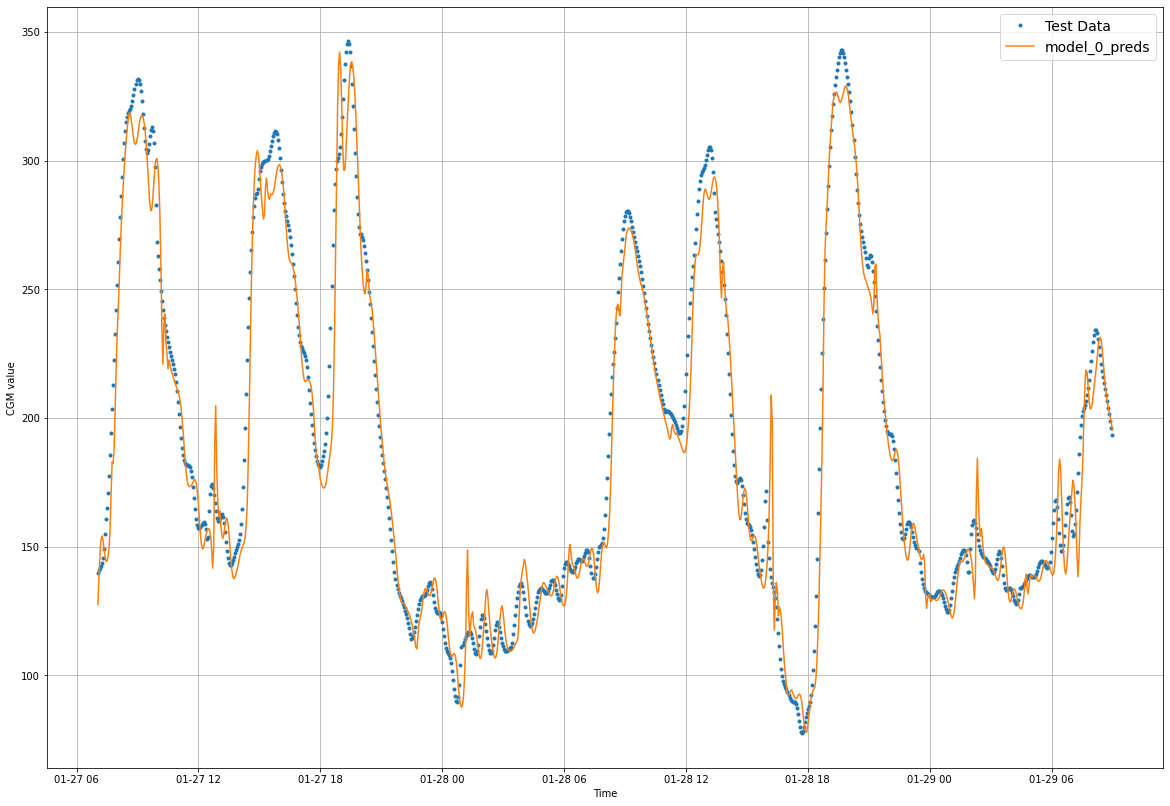

In [123]:
# Plot model 0 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_0_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_0_preds")

## Evaluation 1-9(mean 9)

In [124]:
# Load in saved best performing model_1_9 and evaluate on test data
model_1_9 = tf.keras.models.load_model("model_experiments/model_1_9_dense/")
model_1_9.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 9.9953 - mae: 9.9953 - mse: 192.5172


[9.995346069335938, 9.995346069335938, 192.51718139648438]

In [125]:
# predict #adult010 using model_1_9
model_1_9_preds = make_preds(model_1_9, test_windows_7d_no10)
len(model_1_9_preds), model_1_9_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([87.991615, 91.51421 , 94.45048 , 96.14372 , 96.05026 , 94.18936 ,
        91.5661  , 89.20341 , 88.06226 , 89.33011 ], dtype=float32)>)

In [126]:
# Evaluate preds
model_1_9_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_1_9_preds)
model_1_9_results

{'mae': 9.99535, 'mape': 5.975435, 'mse': 192.51723, 'rmse': 13.875057}

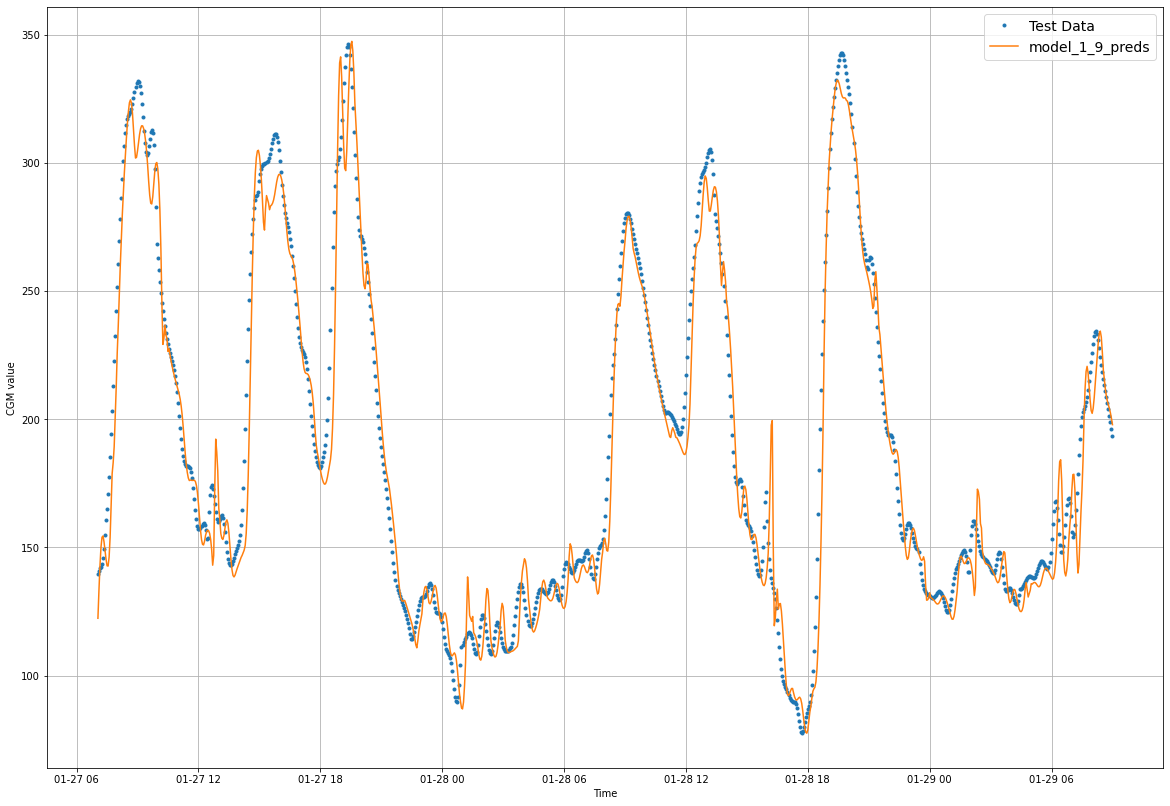

In [127]:
# Plot model_1_9 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_1_9_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_9_preds")

## Evaluation 1-7(mean 7)

In [128]:
# Load in saved best performing model_1_9 and evaluate on test data
model_1_7 = tf.keras.models.load_model("model_experiments/model_1_7_dense/")
model_1_7.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 10.1353 - mae: 10.1353 - mse: 195.8790


[10.13526439666748, 10.13526439666748, 195.8789825439453]

In [129]:
# predict #adult010 using model_1_7
model_1_7_preds = make_preds(model_1_7, test_windows_7d_no10)
len(model_1_7_preds), model_1_7_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([87.150246, 90.75652 , 93.7271  , 95.3561  , 95.167046, 93.229706,
        90.54615 , 88.39501 , 88.82739 , 90.21517 ], dtype=float32)>)

In [130]:
# Evaluate preds
model_1_7_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_1_7_preds)
model_1_7_results

{'mae': 10.135263, 'mape': 6.0044456, 'mse': 195.8789, 'rmse': 13.995674}

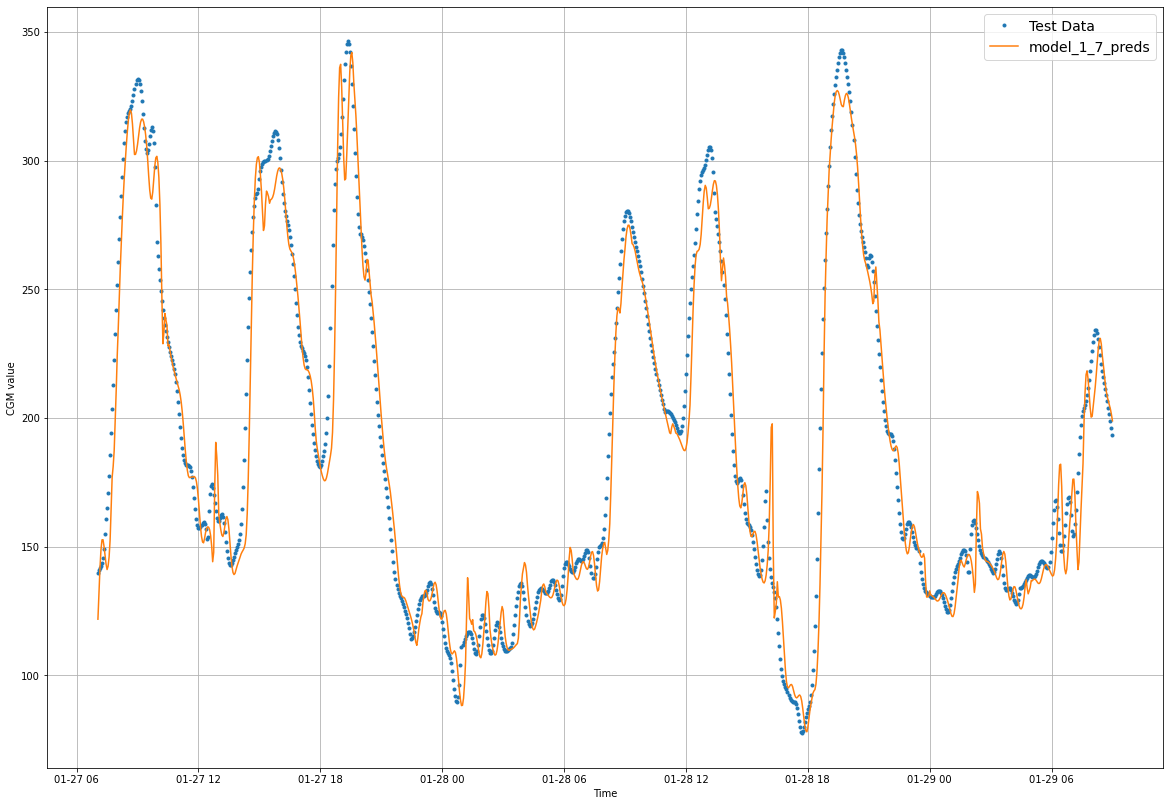

In [131]:
# Plot model_1_7 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_1_7_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_7_preds")

## Evaluation 1-6(mean 6)

In [132]:
# Load in saved best performing model_1 and evaluate on test data
model_1_6 = tf.keras.models.load_model("model_experiments/model_1_6_dense/")
model_1_6.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 10.0019 - mae: 10.0019 - mse: 189.4102


[10.001927375793457, 10.001927375793457, 189.41018676757812]

In [133]:
# predict #adult010 using model_1_6
model_1_6_preds = make_preds(model_1_6, test_windows_7d_no10)
len(model_1_6_preds), model_1_6_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([87.89418 , 91.62491 , 94.59501 , 96.10359 , 95.76219 , 93.82276 ,
        91.07866 , 89.07418 , 89.51144 , 90.754326], dtype=float32)>)

In [134]:
# Evaluate preds
model_1_6_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_1_6_preds)
model_1_6_results

{'mae': 10.001927, 'mape': 5.977797, 'mse': 189.41023, 'rmse': 13.762639}

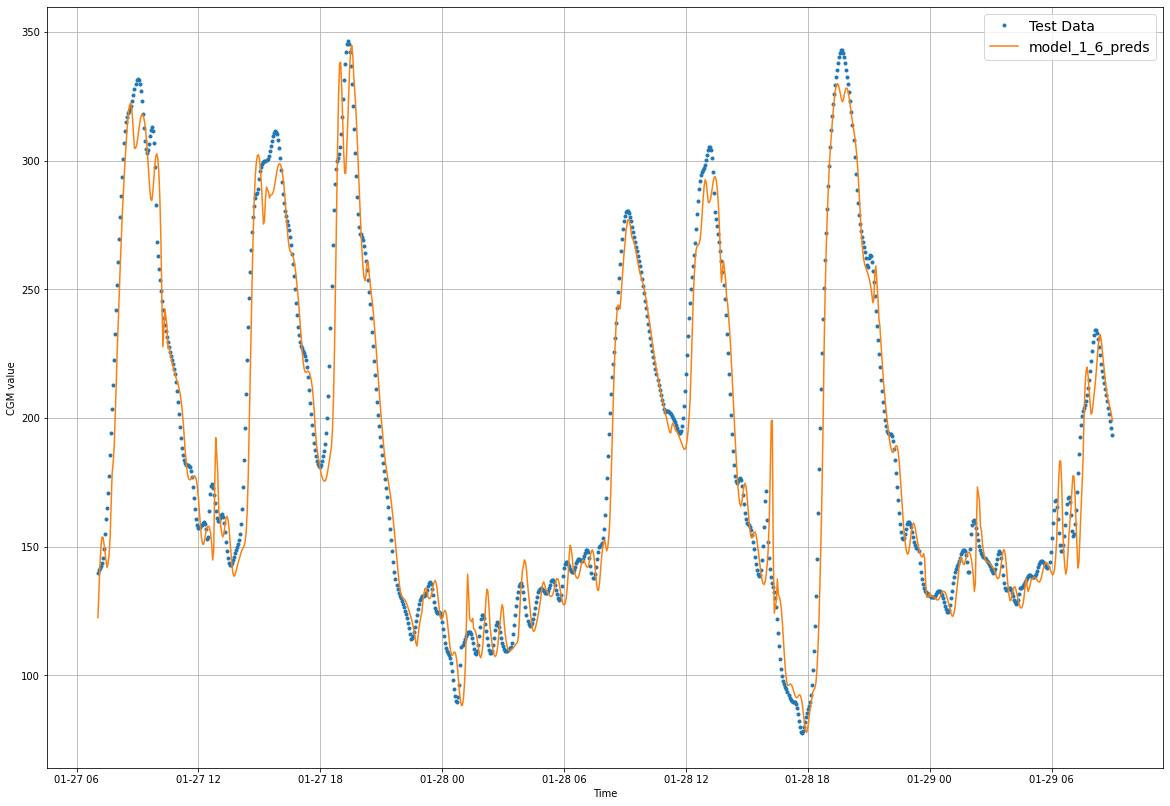

In [135]:
# Plot model_1_6 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_1_6_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_6_preds")

## Evaluation 1-5(mean 5)

In [136]:
# Load in saved best performing model_1 and evaluate on test data
model_1_5 = tf.keras.models.load_model("model_experiments/model_1_5_dense/")
model_1_5.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 9.8628 - mae: 9.8628 - mse: 181.1933


[9.862836837768555, 9.862836837768555, 181.19329833984375]

In [137]:
# predict #adult010 using model_1_5
model_1_5_preds = make_preds(model_1_5, test_windows_7d_no10)
len(model_1_5_preds), model_1_5_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([89.81578 , 93.68061 , 96.7301  , 98.179855, 97.676895, 95.48087 ,
        92.58567 , 90.3404  , 90.711365, 91.97659 ], dtype=float32)>)

In [138]:
# Evaluate preds
model_1_5_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_1_5_preds)
model_1_5_results

{'mae': 9.86284, 'mape': 5.980218, 'mse': 181.1933, 'rmse': 13.460806}

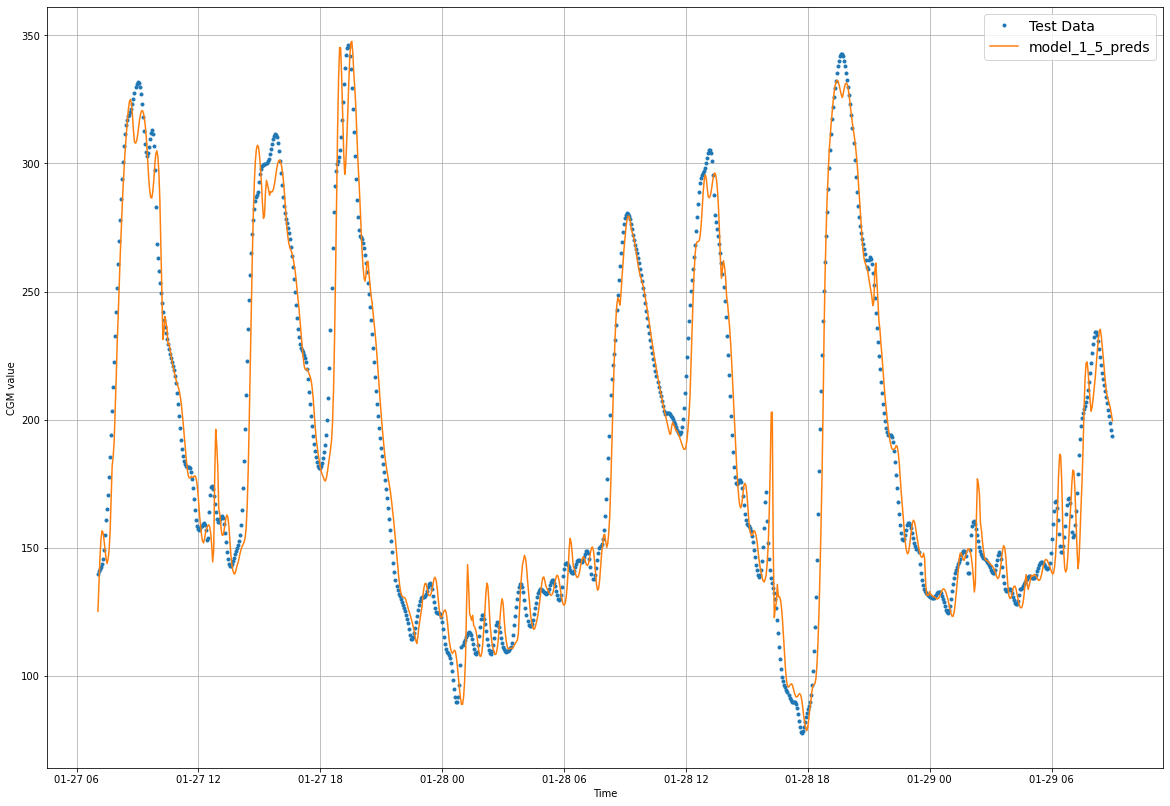

In [139]:
# Plot model_1_6 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_1_5_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_5_preds")

## Evaluation 1-3(mean 3)

In [140]:
# Load in saved best performing model_1 and evaluate on test data
model_1_3 = tf.keras.models.load_model("model_experiments/model_1_3_dense/")
model_1_3.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 11.8011 - mae: 11.8011 - mse: 279.6261


[11.801124572753906, 11.801124572753906, 279.6261291503906]

In [141]:
# predict #adult010 using model_1_3
model_1_3_preds = make_preds(model_1_3, test_windows_7d_no10)
len(model_1_3_preds), model_1_3_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([85.93364 , 88.98181 , 91.8346  , 93.86981 , 94.607796, 94.06595 ,
        92.84117 , 91.60641 , 90.88745 , 91.233894], dtype=float32)>)

In [142]:
# Evaluate preds
model_1_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_1_3_preds)
model_1_3_results

{'mae': 11.801125, 'mape': 6.7066965, 'mse': 279.62616, 'rmse': 16.722027}

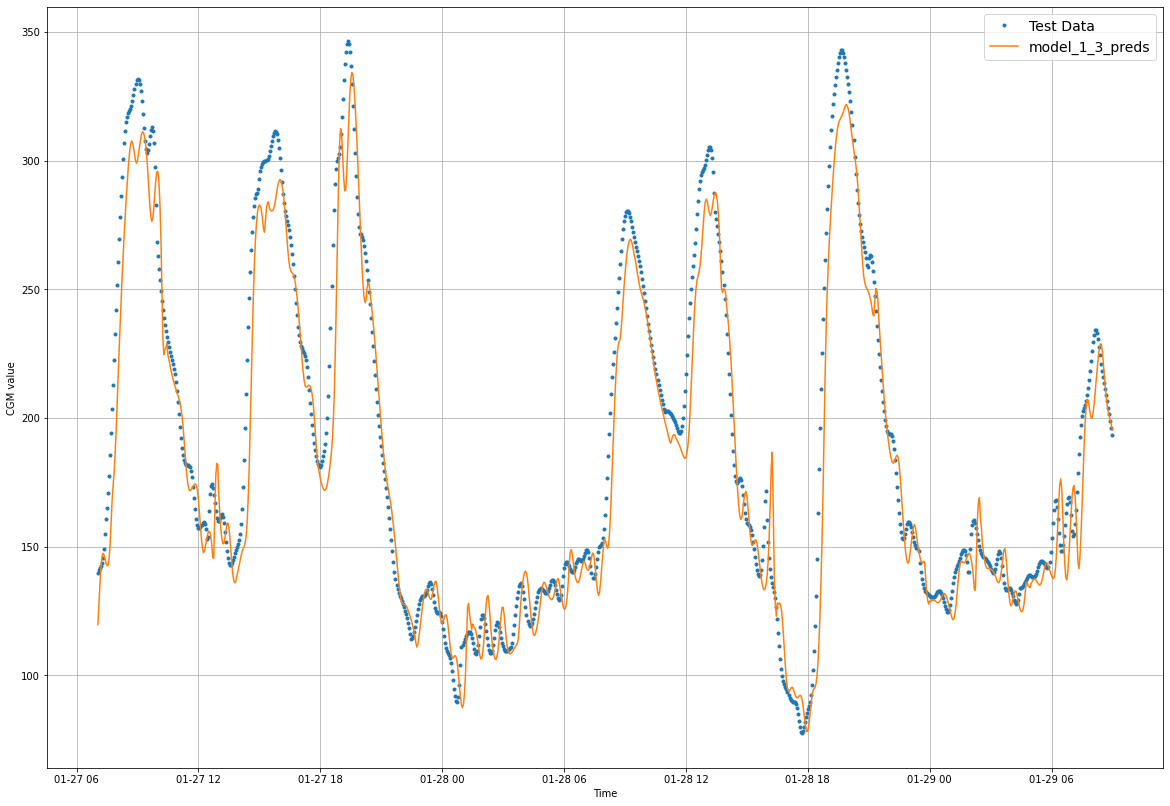

In [143]:
# Plot model_1_3 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_1_3_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_1_3_preds")

## Evaluation 2-9(mean 9)

In [144]:
# Load in saved best performing model_2_9 and evaluate on test data
model_2_9 = tf.keras.models.load_model("model_experiments/model_2_9_dense/")
model_2_9.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 10.1274 - mae: 10.1274 - mse: 196.4606


[10.127398490905762, 10.127398490905762, 196.4605712890625]

In [145]:
# predict #adult010 using model_2_9
model_2_9_preds = make_preds(model_2_9, test_windows_7d_no10)
len(model_2_9_preds), model_2_9_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([87.26413 , 90.72827 , 93.65846 , 95.38563 , 95.39633 , 93.499916,
        90.761765, 88.361404, 88.53892 , 89.94992 ], dtype=float32)>)

In [146]:
# Evaluate preds
model_2_9_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_2_9_preds)
model_2_9_results

{'mae': 10.127396, 'mape': 6.018332, 'mse': 196.46053, 'rmse': 14.016438}

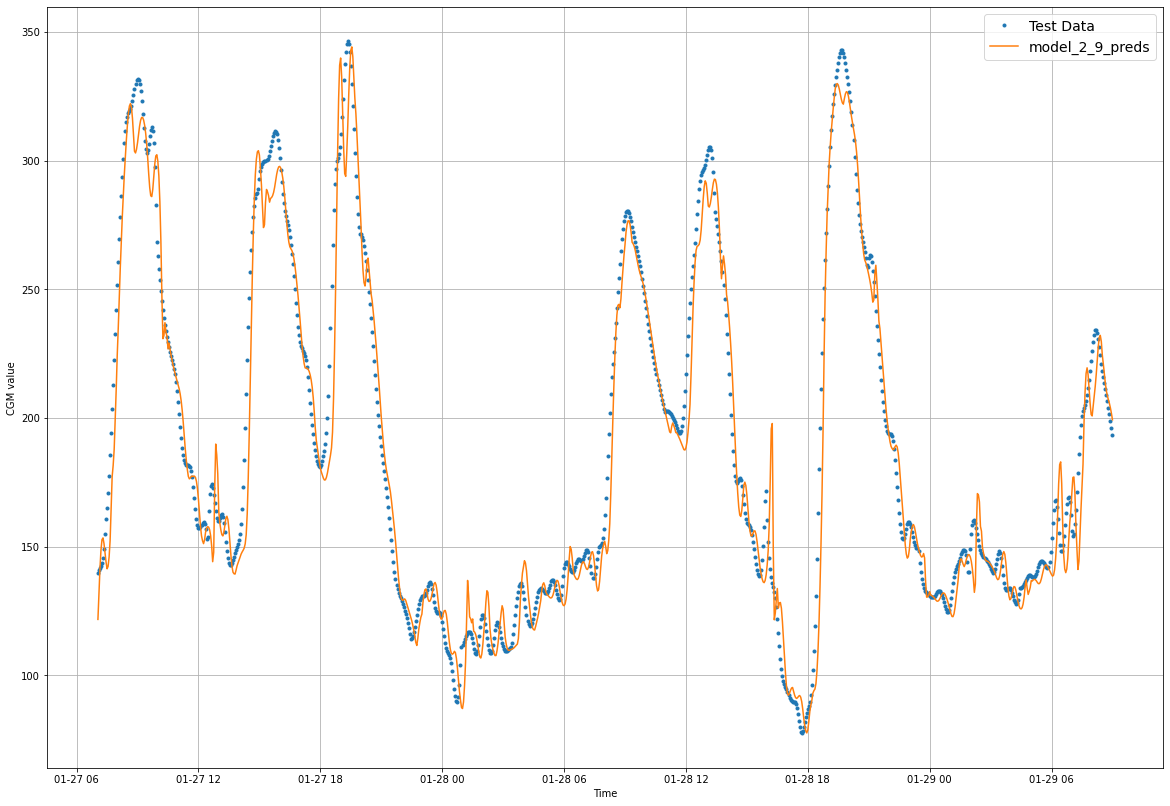

In [147]:
# Plot model_2_9 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_2_9_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_9_preds")

## Evaluation 2-7(mean 7)

In [148]:
# Load in saved best performing model_2_9 and evaluate on test data
model_2_7 = tf.keras.models.load_model("model_experiments/model_2_7_dense/")
model_2_7.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 9.8826 - mae: 9.8826 - mse: 187.4927


[9.882599830627441, 9.882599830627441, 187.49269104003906]

In [149]:
# predict #adult010 using model_2_9
model_2_7_preds = make_preds(model_2_7, test_windows_7d_no10)
len(model_2_7_preds), model_2_7_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([88.42732 , 92.10186 , 95.04692 , 96.56979 , 96.25126 , 94.33423 ,
        91.65232 , 89.385574, 88.65271 , 90.05554 ], dtype=float32)>)

In [150]:
# Evaluate preds
model_2_7_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_2_7_preds)
model_2_7_results

{'mae': 9.882599, 'mape': 5.924343, 'mse': 187.49268, 'rmse': 13.692797}

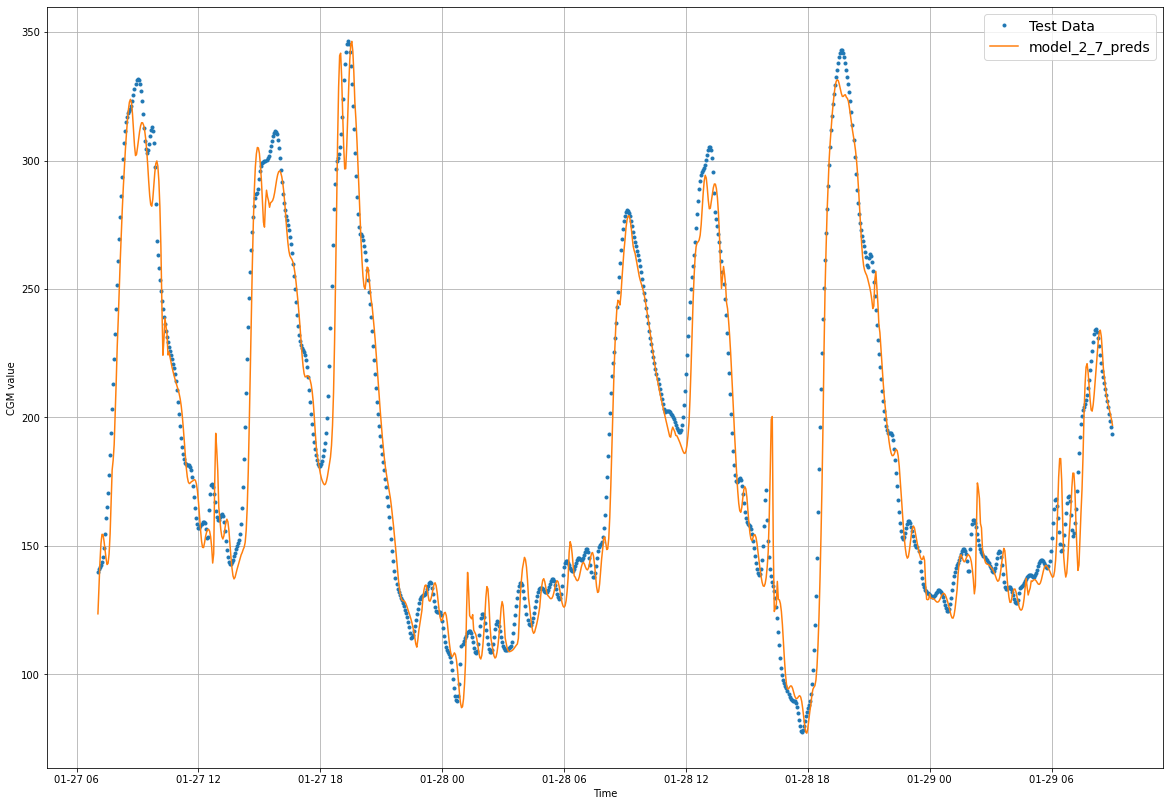

In [151]:
# Plot model_2_7 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_2_7_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_7_preds")

## Evaluation 2-6(mean 6)

In [152]:
# Load in saved best performing model_2_6 and evaluate on test data
model_2_6 = tf.keras.models.load_model("model_experiments/model_2_6_dense/")
model_2_6.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 10.0303 - mae: 10.0303 - mse: 186.8642


[10.0303316116333, 10.0303316116333, 186.86419677734375]

In [153]:
# predict #adult010 using model_2_6
model_2_6_preds = make_preds(model_2_6, test_windows_7d_no10)
len(model_2_6_preds), model_2_6_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([88.885254, 92.555855, 95.54246 , 97.27378 , 97.07705 , 95.12074 ,
        92.33057 , 90.06133 , 89.946915, 91.18638 ], dtype=float32)>)

In [154]:
# Evaluate preds
model_2_6_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_2_6_preds)
model_2_6_results

{'mae': 10.03033, 'mape': 6.0558686, 'mse': 186.8642, 'rmse': 13.669827}

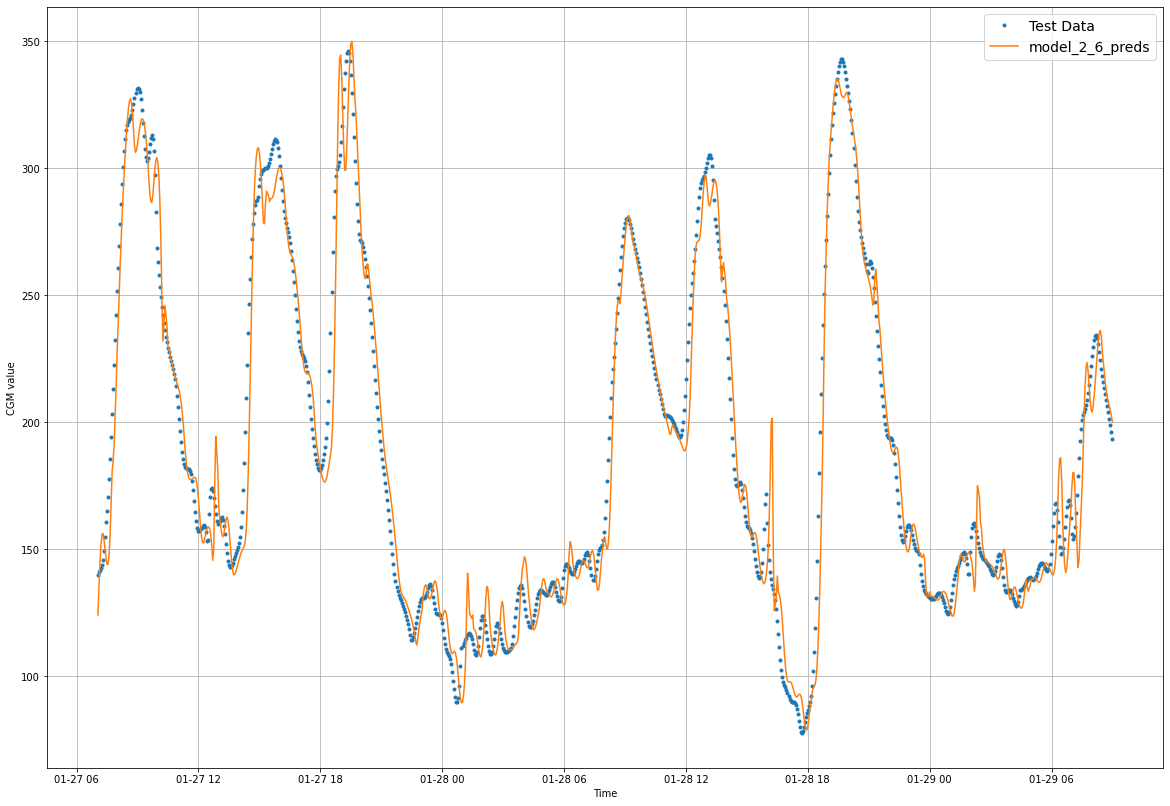

In [155]:
# Plot model_2_6 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_2_6_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_6_preds")

## Evaluation 2-5(mean 5)

In [156]:
# Load in saved best performing model_1 and evaluate on test data
model_2_5 = tf.keras.models.load_model("model_experiments/model_2_5_dense/")
model_2_5.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 9.8810 - mae: 9.8810 - mse: 180.7159


[9.88102912902832, 9.88102912902832, 180.7158966064453]

In [157]:
# predict #adult010 using model_2_5
model_2_5_preds = make_preds(model_2_5, test_windows_7d_no10)
len(model_2_5_preds), model_2_5_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([89.98909 , 93.77578 , 96.71603 , 98.163055, 97.61955 , 95.386375,
        92.45422 , 90.62924 , 91.059975, 92.38956 ], dtype=float32)>)

In [158]:
# Evaluate preds
model_2_5_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_2_5_preds)
model_2_5_results

{'mae': 9.881028, 'mape': 5.991863, 'mse': 180.71596, 'rmse': 13.443064}

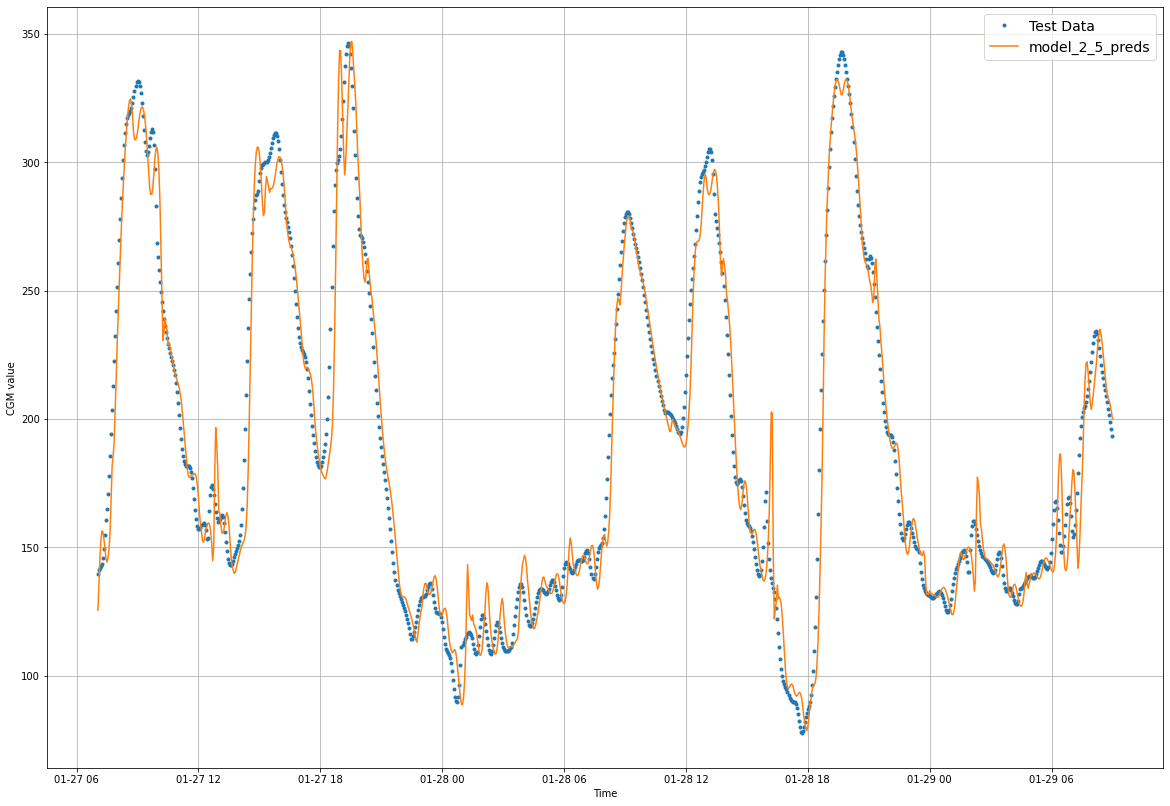

In [159]:
# Plot model_2_5 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_2_5_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_5_preds")

## Evaluation 2-3(mean 3)

In [160]:
# Load in saved best performing model_2_3 and evaluate on test data
model_2_3 = tf.keras.models.load_model("model_experiments/model_2_3_dense/")
model_2_3.evaluate(test_windows_7d_no10, test_labels_7d_no10)

105/105 [==============================] - 0s 2ms/step - loss: 12.3458 - mae: 12.3458 - mse: 314.8051


[12.345808029174805, 12.345808029174805, 314.8050842285156]

In [161]:
# predict #adult010 using model_1_3
model_2_3_preds = make_preds(model_2_3, test_windows_7d_no10)
len(model_2_3_preds), model_2_3_preds[:10]

(3360, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([86.03368 , 88.950874, 91.55202 , 93.29442 , 93.86112 , 93.386375,
        92.41462 , 91.52773 , 91.23742 , 91.88891 ], dtype=float32)>)

In [162]:
# Evaluate preds
model_2_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_7d_no10), # reduce to right shape
                                 y_pred=model_2_3_preds)
model_2_3_results

{'mae': 12.34581, 'mape': 6.855296, 'mse': 314.80515, 'rmse': 17.742748}

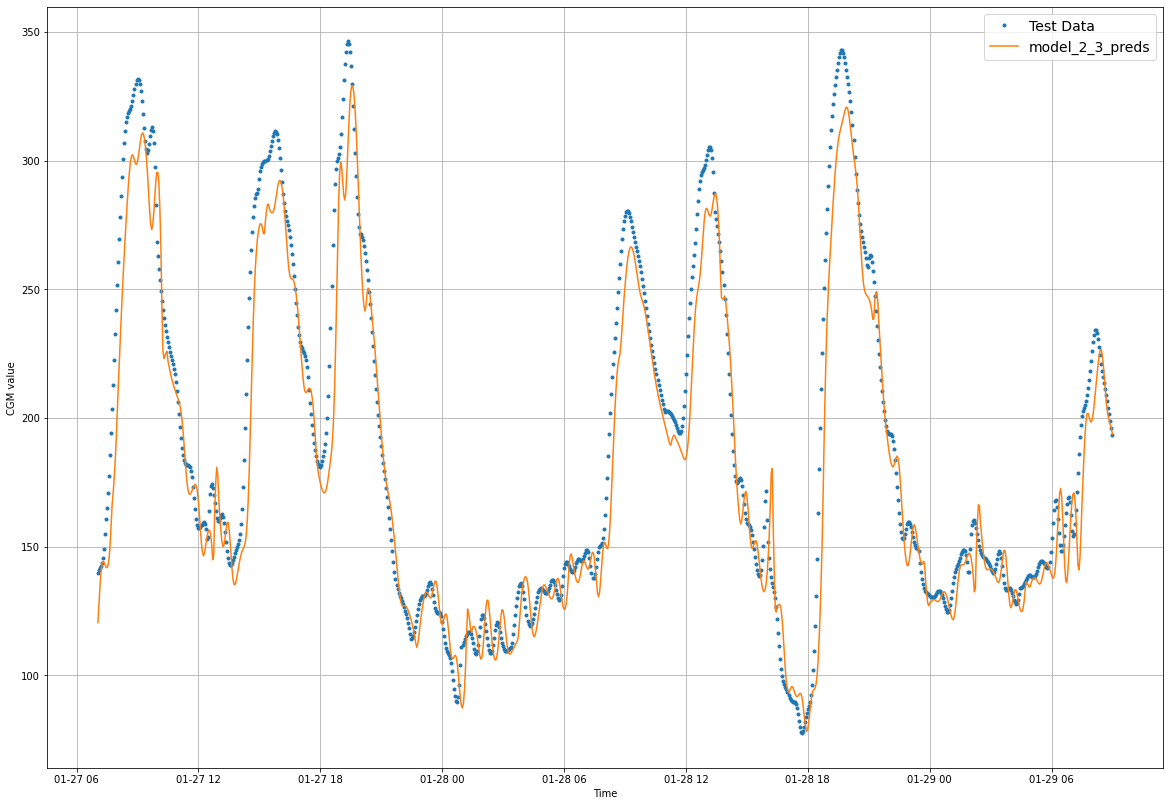

In [163]:
# Plot model_2_3 predictions
offset_s = 500
offset_e = 1500
plt.figure(figsize=(20, 14))
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=test_labels_7d_no10[:, 0],
                 start=offset_s,
                end=offset_e,
                 label="Test Data")
plot_time_series(timesteps=x_test_7d_no10[-len(test_windows_7d_no10):],
                 values=model_2_3_preds,
                 start=offset_s,
                 end=offset_e,
                 format="-",
                 label="model_2_3_preds")